# Multiple Linear Regression

In [ ]:
from torch import nn
import torch
torch.manual_seed(1)

w = torch.tensor([[2.0],[3.0]],requires_grad=True)
b = torch.tensor([[1.0]],requires_grad=True)

def forward(x):
  return torch.mm(w,x)+b

x = torch.tensor([[1.0,2.0]])
yhat = forward(x)
print("The result: ", yhat)

X = torch.tensor([[[1.0,1.0],[1.0,2.0],[1.0,3.0]]])
# yhat = forward(X)

model = nn.Linear(in_features=2,out_features=1)
yhat = model(x)

# build custom model
class linear_regression(nn.Module):

  def __init__(self,input_size,output_size):
    super(linear_regression,self).__init__()
    self.linear = nn.Linear(input_size,output_size)

  def forward(self,x):
    yhat = self.linear(x)
    return yhat


model = linear_regression(2,1)
print("The parameters: ", list(model.parameters()))
print("The parameters: ", model.state_dict())
yhat = model(x)
print("The result: ", yhat)


The result:  tensor([[3., 5.],
        [4., 7.]], grad_fn=<AddBackward0>)
The parameters:  [Parameter containing:
tensor([[ 0.3319, -0.6657]], requires_grad=True), Parameter containing:
tensor([0.4241], requires_grad=True)]
The parameters:  OrderedDict([('linear.weight', tensor([[ 0.3319, -0.6657]])), ('linear.bias', tensor([0.4241]))])
The result:  tensor([[-0.5754]], grad_fn=<AddmmBackward0>)


In [ ]:
# # 將data傳入model進行forward propagation
# # 計算loss
# # 清空前一次的gradient
# # 根據loss進行back propagation，計算gradient
# # 做gradient descent
# output = model(batch_x)
# loss = criterion(output, batch_y)
# optimizer.zero_grad()
# loss.backward()
# optimizer.step()

# Pytorch不幫你自動清空gradient，而是要你呼叫optimizer.zero_grad()來做這件事是因為，這樣子你可以有更大的彈性去做一些黑魔法，畢竟，誰規定每一次iteration都要清空gradient?

# 試想你今天GPU的資源就那麼小，可是你一定要訓練一個很大的model，然後如果batch size不大又train不起來，那這時候該怎麼辦?

# 雖然沒有課金解決不了的事情，如果有，那就多課一點…不是，這邊提供另外一種設計思維:

# 你可以將你的model每次都用小的batch size去做forward/backward，但是在update的時候是多做幾個iteration在做一次。

# 這個想法就是梯度累加(gradient accumulation)，也就是說我們透過多次的iteration累積backward的loss，然後只對應做了一次update，間接的做到了大batch size時候的效果。

# for idx, (batch_x, batch_y) in enumerate(data_loader):
#     output = model(batch_x)
#     loss = criterion(output, batch_y)

#     loss = loss / accumulation_step
#     loss.backward()

#     if (idx % accumulation_step) == 0:
#         optimizer.step() # update
#         optimizer.zero_grad() # reset

Before Training: 
OrderedDict([('linear.weight', tensor([[-0.3350,  0.0283]])), ('linear.bias', tensor([-0.1450]))])


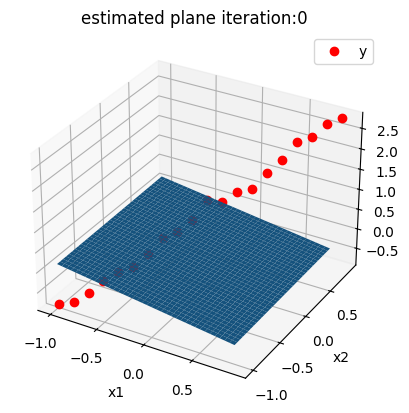

After Training: 
OrderedDict([('linear.weight', tensor([[0.8502, 1.2135]])), ('linear.bias', tensor([0.9913]))])


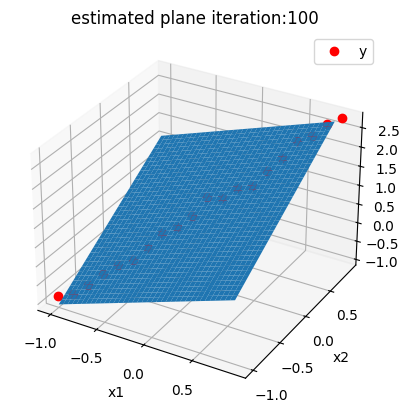

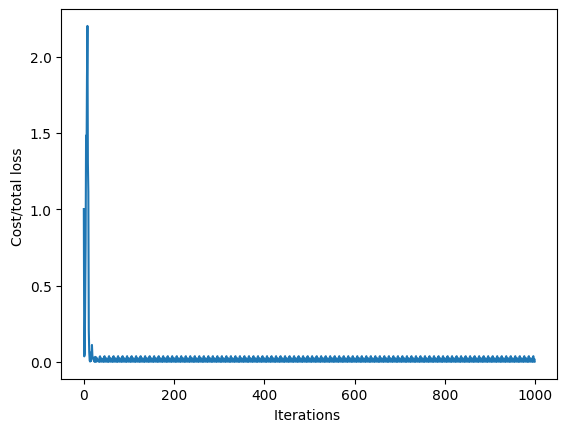

In [ ]:
from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset,DataLoader

def Plot_2D_Plane(model,dataset,n=0):
  print(model.state_dict())
  w1 = model.state_dict()['linear.weight'].numpy()[0][0]
  w2 = model.state_dict()['linear.weight'].numpy()[0][1]
  b = model.state_dict()['linear.bias'].numpy()

  x1 = dataset.x[:,0].view(-1,1).numpy() #-1代表自動判斷維度
  x2 = dataset.x[:,1].view(-1,1).numpy()
  y = dataset.y.numpy()

  X,Y = np.meshgrid(np.arange(x1.min(),x1.max(),0.05),np.arange(x2.min(),x2.max(),0.05))
  yhat = w1*X + w2*Y +b

  fig = plt.figure()
  ax =  fig.add_subplot(projection='3d')
  ax.plot(x1[:,0],x2[:,0],y[:,0],'ro',label='y')
  ax.plot_surface(X,Y,yhat)

  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_zlabel('y')
  plt.title('estimated plane iteration:' + str(n))
  ax.legend()

  plt.show()

class Data2D(Dataset):
  def __init__(self):
    self.x = torch.zeros(20,2)
    self.x[:,0] = torch.arange(-1,1,0.1)
    self.x[:,1] = torch.arange(-1,1,0.1)
    self.w = torch.tensor([[1.0],[1.0]])
    self.b  =1
    self.f = torch.mm(self.x,self.w) + self.b
    self.y = self.f + 0.1* torch.randn((self.x.shape[0],1))
    self.len = self.x.shape[0]

  def __getitem__(self,index):
    return self.x[index],self.y[index]

  def __len__(self):
    return self.len

data_set = Data2D()

class linear_regression(nn.Module):
  def __init__(self,input_size,output_size):
    super(linear_regression,self).__init__()
    self.linear = nn.Linear(in_features = input_size,out_features=output_size)

  def forward(self,x):
    yhat = self.linear(x)
    return yhat

model = linear_regression(2,1)
optimizer = optim.SGD(model.parameters(),lr=0.1)
criterion = nn.MSELoss()
train_loader = DataLoader(dataset=data_set, batch_size=2)

LOSS = []
print("Before Training: ")
Plot_2D_Plane(model, data_set)
epochs = 100

def train_model(epochs):
  for epoch in range(epochs):
    for x,y in train_loader:
      yhat = model(x)
      loss = criterion(yhat,y)
      LOSS.append(loss)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

train_model(epochs)
print("After Training: ")
Plot_2D_Plane(model, data_set, epochs)
with torch.no_grad():
  plt.plot(LOSS)
  plt.xlabel("Iterations ")
  plt.ylabel("Cost/total loss ")
  plt.show()


In [ ]:
from torch import nn
import torch
torch.manual_seed(1)

class linear_regression(nn.Module):
  def __init__(self,input_size,output_size):
    super(linear_regression,self).__init__()
    self.linear = nn.Linear(input_size,output_size)

  def forward(self,x):
    return self.linear(x)


model = linear_regression(1,10)
model(torch.tensor([1.0]))
print(list(model.parameters()))

x=torch.tensor([[1.0]])
print(model(x))

X=torch.tensor([[1.0],[1.0],[3.0]])
print(model(X))

[Parameter containing:
tensor([[ 0.5153],
        [-0.4414],
        [-0.1939],
        [ 0.4694],
        [-0.9414],
        [ 0.5997],
        [-0.2057],
        [ 0.5087],
        [ 0.1390],
        [-0.1224]], requires_grad=True), Parameter containing:
tensor([ 0.2774,  0.0493,  0.3652, -0.3897, -0.0729, -0.0900,  0.1449, -0.0040,
         0.8742,  0.3112], requires_grad=True)]
tensor([[ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887]], grad_fn=<AddmmBackward0>)
tensor([[ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887],
        [ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887],
        [ 1.8232, -1.2748, -0.2164,  1.0184, -2.8972,  1.7091, -0.4722,  1.5222,
          1.2912, -0.0561]], grad_fn=<AddmmBackward0>)


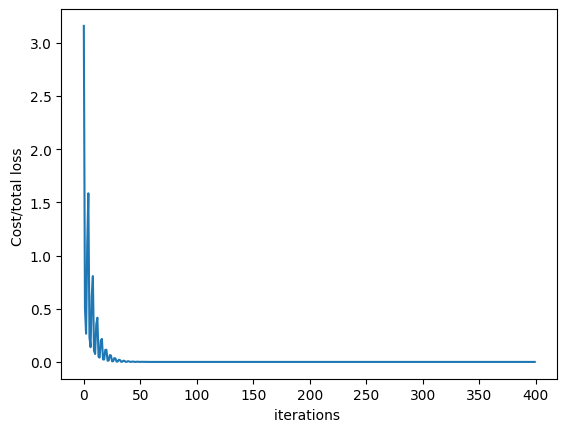

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import optim,nn
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

torch.manual_seed(1)
class Data(Dataset):
  def __init__(self):
    self.x = torch.zeros(20,2)
    self.x[:,0] = torch.arange(-1,1,0.1)
    self.x[:,1] = torch.arange(-1,1,0.1)
    self.w = torch.tensor([ [1.0,-1.0],[1.0,3.0]])
    self.b = torch.tensor([[1.0,-1.0]])
    self.f = torch.mm(self.x,self.w)+self.b
    self.y = self.f+0.001*torch.randn((self.x.shape[0],1))
    self.len=self.x.shape[0]

  def __getitem__(self,index):
    return self.x[index] , self.y[index]

  def __len__(self):
    return self.len

data_set=Data()
class linear_regression(nn.Module):
  def __init__(self,input_size,output_size):
    super(linear_regression,self).__init__()
    self.linear = nn.Linear(input_size,output_size)

  def forward(self,x):
    return self.linear(x)

model=linear_regression(2,2)
optimizer = optim.SGD(model.parameters(),lr = 0.1)
criterion = nn.MSELoss()
train_loader=DataLoader(dataset=data_set,batch_size=5)

LOSS = []
epochs = 100
for epoch in range(epochs):
  for x,y in train_loader:
    yhat = model(x)
    loss = criterion(yhat,y)
    LOSS.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
with torch.no_grad():
  plt.plot(LOSS)
  plt.xlabel("iterations ")
  plt.ylabel("Cost/total loss ")
  plt.show()


# Logistic Regression

x =  tensor([[1.]])
X =  tensor([[  1.],
        [100.]])
list(model.parameters()):
  [Parameter containing:
tensor([[0.2294]], requires_grad=True), Parameter containing:
tensor([-0.2380], requires_grad=True)]

model.state_dict():
  OrderedDict([('0.weight', tensor([[0.2294]])), ('0.bias', tensor([-0.2380]))])
The prediction:  tensor([[0.4979]], grad_fn=<SigmoidBackward0>)
The prediction:  tensor([[0.4979],
        [1.0000]], grad_fn=<SigmoidBackward0>)
x =  tensor([[1., 1.]])
X =  tensor([[1., 1.],
        [1., 2.],
        [1., 3.]])
list(model.parameters()):
  [Parameter containing:
tensor([[ 0.1939, -0.0361]], requires_grad=True), Parameter containing:
tensor([0.3021], requires_grad=True)]

model.state_dict():
  OrderedDict([('0.weight', tensor([[ 0.1939, -0.0361]])), ('0.bias', tensor([0.3021]))])
The prediction:  tensor([[0.6130]], grad_fn=<SigmoidBackward0>)
The prediction:  tensor([[0.6130],
        [0.6044],
        [0.5957]], grad_fn=<SigmoidBackward0>)
x =  tensor([[1.]])
X 

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1 and 2x1)

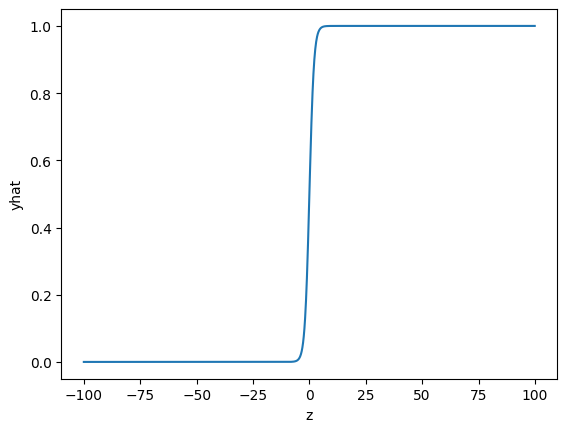

In [ ]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(2)
z = torch.arange(-100,100,0.1).view(-1,1) #view的作用是reshape
sig = nn.Sigmoid()
yhat = sig(z)

plt.plot(z.numpy(), yhat.numpy())
plt.xlabel('z')
plt.ylabel('yhat')

x = torch.tensor([[1.0]])
X = torch.tensor([[1.0], [100]])
print('x = ', x)
print('X = ', X)

model = nn.Sequential(nn.Linear(1,1),nn.Sigmoid())
print("list(model.parameters()):\n ", list(model.parameters()))
print("\nmodel.state_dict():\n ", model.state_dict())
yhat = model(x)
print("The prediction: ", yhat)
yhat = model(X)
print("The prediction: ", yhat)

x = torch.tensor([[1.0, 1.0]])
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])
print('x = ', x)
print('X = ', X)
model = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())
print("list(model.parameters()):\n ", list(model.parameters()))
print("\nmodel.state_dict():\n ", model.state_dict())
yhat = model(x)
print("The prediction: ", yhat)
yhat = model(X)
print("The prediction: ", yhat)

class logistic_regression(nn.Module):
  def __init__(self,n_inputs):
    super(logistic_regression,self).__init__()
    self.linear = nn.Linear(n_inputs,1)

  def forward(self,x):
    return self.linear(x)

x = torch.tensor([[1.0]])
X = torch.tensor([[-100], [0], [100.0]])
print('x = ', x)
print('X = ', X)
model = logistic_regression(2)
print("list(model.parameters()):\n ", list(model.parameters()))
print("\nmodel.state_dict():\n ", model.state_dict())
yhat = model(x)
print("The prediction result: \n", yhat)
yhat = model(X)
print("The prediction result: \n", yhat)

x = torch.tensor([[1.0, 2.0]])
X = torch.tensor([[100, -100], [0.0, 0.0], [-100, 100]])
print('x = ', x)
print('X = ', X)
yhat = model(x)
print("The prediction result: \n", yhat)
yhat = model(X)
print("The prediction result: \n", yhat)

## Logistic Regression and Bad Initialization Value

The parameters:  OrderedDict([('linear.weight', tensor([[-5.]])), ('linear.bias', tensor([-10.]))])


<Figure size 640x480 with 0 Axes>

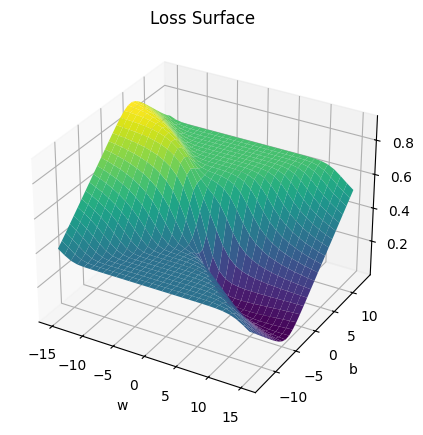

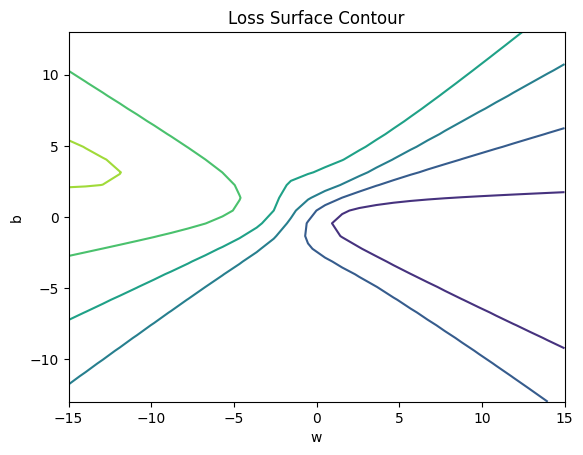

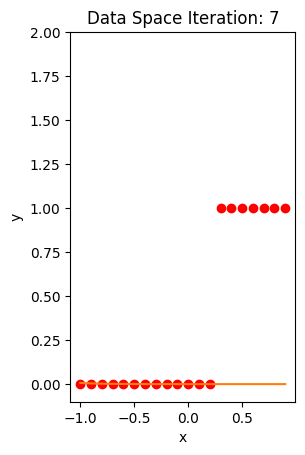

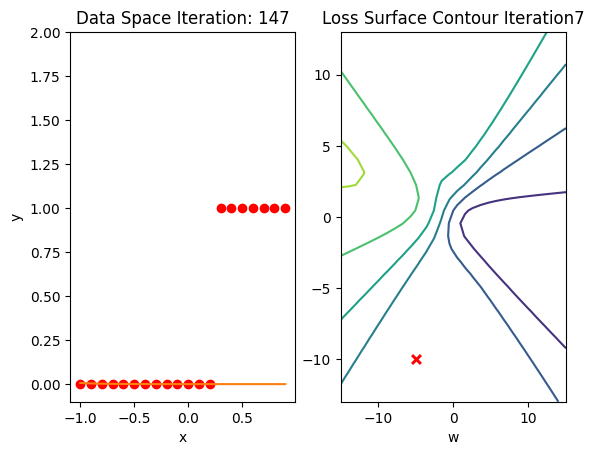

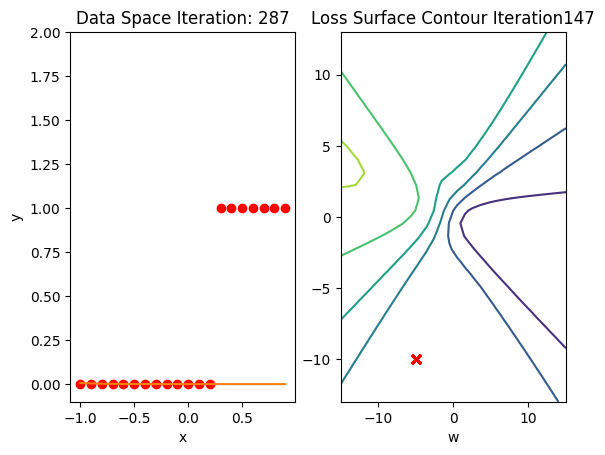

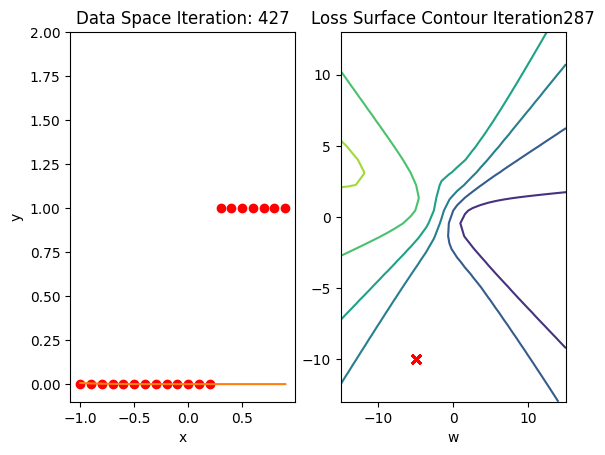

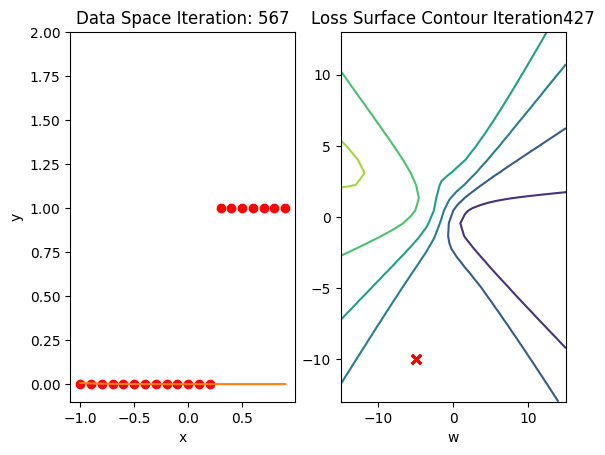

The accuracy:  tensor(0.6500)


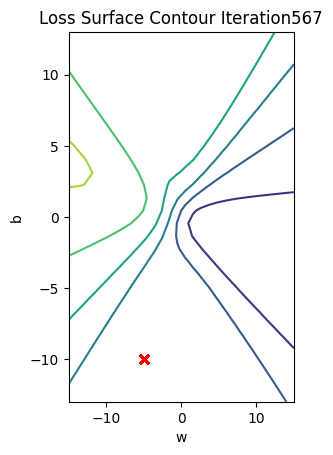

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from mpl_toolkits import mplot3d
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn

class plot_error_surfaces(object):
  def __init__(self,w_range,b_range,X,Y,n_samples=30,go=True):
    W = np.linspace(-w_range,w_range,n_samples)
    B = np.linspace(-b_range,b_range,n_samples)
    w,b = np.meshgrid(W,B)
    Z = np.zeros((30,30))
    count1 = 0
    self.y = Y.numpy()
    self.x = X.numpy()
    for w1,b1 in zip(w,b):
      count2 = 0
      for w2,b2 in zip(w1,b1):
        Z[count1, count2] = np.mean((self.y - (1 / (1 + np.exp(-1*w2 * self.x - b2)))) ** 2)
        count2 += 1
      count1+=1
    self.Z=Z
    self.w = w
    self.b = b
    self.W = []
    self.B = []
    self.LOSS = []
    self.n = 0
    if go==True:
      plt.figure()
      plt.figure(figsize = (7.5,5))
      plt.axes(projection='3d').plot_surface(self.w,self.b,self.Z,rstride=1,cstride=1,cmap='viridis',edgecolor='none')
      plt.title('Loss Surface')
      plt.xlabel('w')
      plt.ylabel('b')
      plt.show()
      plt.figure()
      plt.title('Loss Surface Contour')
      plt.xlabel('w')
      plt.ylabel('b')
      plt.contour(self.w,self.b,self.Z)
      plt.show()

  def set_para_loss(self,model,loss):
    self.n = self.n+1
    self.W.append(list(model.parameters())[0].item())
    self.B.append(list(model.parameters())[1].item())
    self.LOSS.append(loss)

  def final_plot(self):
    ax= plt.axes(projection='3d')
    ax.plot_wireframe(self.w,self.b,self.Z)
    ax.scatter(self.W,self.B,self.LOSS,c='r',marker='x',s=200,alpha=1)
    plt.figure()
    plt.contour(self.w,self.b,self.Z)
    plt.scatter(self.W,self.B,c='r',marker='x')
    plt.xlabel('w')
    plt.ylabel('b')
    plt.show()

  def plot_ps(self):
    plt.subplot(121)
    plt.ylim
    plt.plot(self.x,self.y,'ro',label='training points')
    plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
    plt.plot(self.x, 1 / (1 + np.exp(-1 * (self.W[-1] * self.x + self.B[-1]))), label='sigmoid')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim((-0.1,2))
    plt.title('Data Space Iteration: ' + str(self.n))
    plt.show()
    plt.subplot(122)
    plt.contour(self.w, self.b, self.Z)
    plt.scatter(self.W, self.B, c='r', marker='x')
    plt.title('Loss Surface Contour Iteration' + str(self.n))
    plt.xlabel('w')
    plt.ylabel('b')

def PlotStuff(X,Y,model,epoch,leg=True):
  plt.plot(X.numpy(),model(X).detach().numpy(),label=('epoch'+str(epoch)))
  plt.plot(X.numpy(),Y.numpy(),'r')
  if leg==True:
    plt.legend()
  else:
    pass

torch.manual_seed(0)
class Data(Dataset):
  def __init__(self):
    self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
    self.y = torch.zeros(self.x.shape[0], 1)
    self.y[self.x[:, 0] > 0.2] = 1
    self.len = self.x.shape[0]

  def __getitem__(self,index):
    return self.x[index],self.y[index]

  def __len__(self):
    return self.len

data_set = Data()

class logistic_regression(nn.Module):
  def __init__(self,n_inputs):
    super(logistic_regression,self).__init__()
    self.linear = nn.Linear(n_inputs,1)

  def forward(self,x):
    yhat = torch.sigmoid(self.linear(x))
    return yhat

model = logistic_regression(1)
model.state_dict()['linear.weight'].data[0] = torch.tensor([[-5]])
model.state_dict()['linear.bias'].data[0] = torch.tensor([[-10]])
print("The parameters: ", model.state_dict())

get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1], 30)
trainloader = DataLoader(dataset=data_set, batch_size=3)
criterion_rms = nn.MSELoss()
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
def train_model(epochs):
  for epoch in range(epochs):
    for x, y in trainloader:
      yhat = model(x)
      loss = criterion_rms(yhat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      get_surface.set_para_loss(model, loss.tolist())
    if epoch % 20 == 0:
      get_surface.plot_ps()

train_model(100)
yhat = model(data_set.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)))

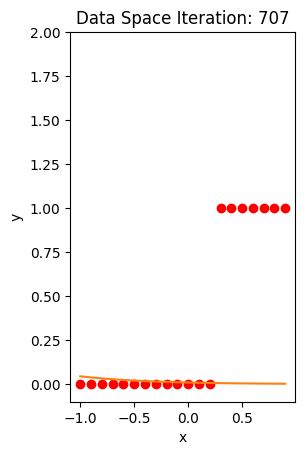

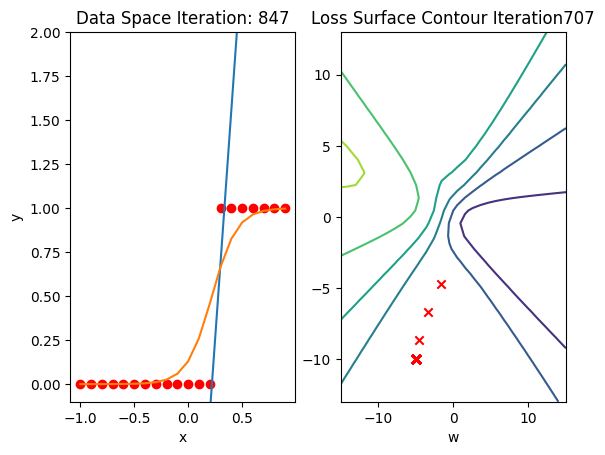

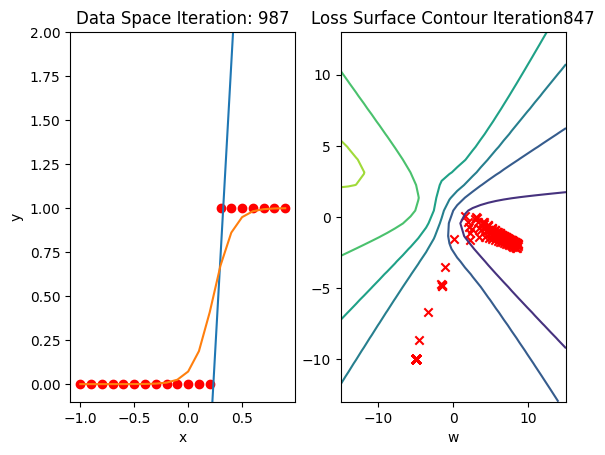

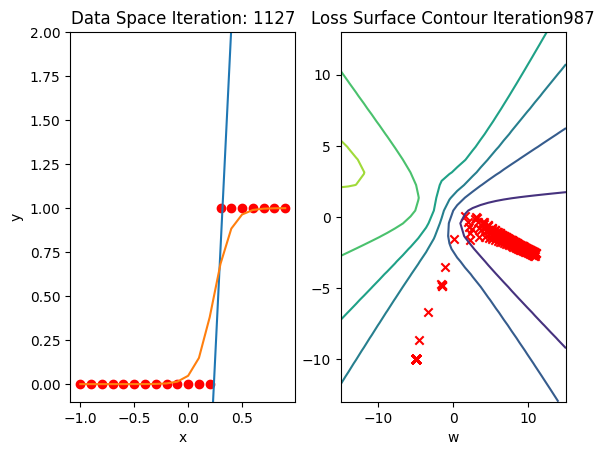

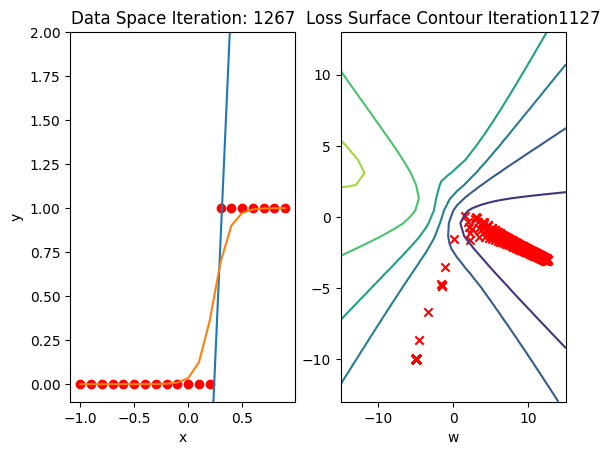

The accuracy:  tensor(1.)


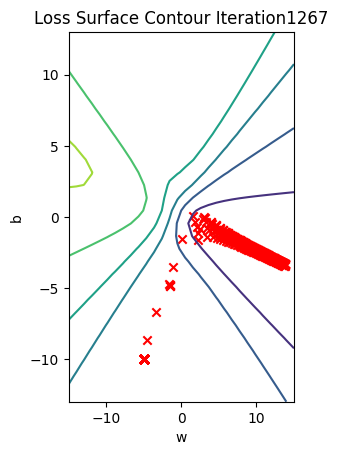

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
def criterion(yhat,y):
  out = -1 * torch.mean(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat))
  return out

# Build in criterion
# criterion = nn.BCELoss()

trainloader = DataLoader(dataset = data_set, batch_size = 3)
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
def train_model(epochs):
  for epoch in range(epochs):
    for x, y in trainloader:
      yhat = model(x)
      loss = criterion(yhat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      get_surface.set_para_loss(model, loss.tolist())
    if epoch % 20 == 0:
      get_surface.plot_ps()

train_model(100)
yhat = model(data_set.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)))

# Deep Neural Network for Breast Cancer Classification

In [ ]:
!pip install ucimlrepo==0.0.7

In [ ]:
from ucimlrepo import fetch_ucirepo
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

import pandas as pd
data = pd.concat([X,y],axis=1)
data_B = data[data['Diagnosis'] == 'B']
data_M = data[data['Diagnosis'] == 'M']

data_B = data_B.sample(n=200, random_state=42)
data_M = data_M.sample(n=200, random_state=42)
balanced_data = pd.concat([data_B, data_M])

display(balanced_data['Diagnosis'].value_counts())

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
X = balanced_data.drop('Diagnosis', axis=1)
y = balanced_data['Diagnosis']
y = y.map({'B': 0, 'M': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from torch.utils.data import DataLoader, TensorDataset
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

import torch.nn as nn
class ClassificationNet(nn.Module):
  def __init__(self,input_units = 30,hidden_units=64,output_units=2):
    super(ClassificationNet,self).__init__()
    self.fc1 = nn.Linear(input_units,hidden_units)
    self.fc2 = nn.Linear(hidden_units,output_units)

  def forward(x):
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x

model = ClassificationNet(input_units=30, hidden_units=64, output_units=2)
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for X_batch,y_batch in train_loader:
    optimizer.zero_grad()
    outputs = model(X_batch)
    loss = criterion(outputs, y_batch)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss/len(train_loader)
  train_losses.append(train_loss)
  model.eval()
  test_loss = 0.0
  with torch.no_grad():
    for X_batch, y_batch in test_loader:
      test_outputs = model(X_batch)
      loss = criterion(test_outputs, y_batch)
      test_loss += loss.item()

  test_loss /= len(test_loader)
  test_losses.append(test_loss)

import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

,count
Diagnosis,
B,200
M,200


TypeError: ClassificationNet.forward() takes 1 positional argument but 2 were given

# Softmax Classifier 1

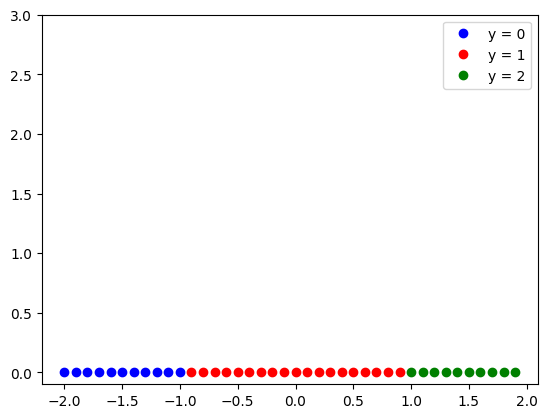

In [ ]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset,DataLoader

def plot_data(data_set,model=None,n=1,color=False):
  X = data_set[:][0]
  Y = data_set[:][1]
  plt.plot(X[Y==0,0].numpy(),Y[Y==0].numpy(),'bo',label = 'y = 0')
  plt.plot(X[Y==1,0].numpy(),0 * Y[Y == 1].numpy(), 'ro', label = 'y = 1')
  plt.plot(X[Y == 2, 0].numpy(), 0 * Y[Y == 2].numpy(), 'go', label = 'y = 2')
  plt.ylim((-0.1,3))
  plt.legend()
  if model != None:
    w = list(model.parameters())[0][0].detach()
    b = list(model.parameters())[1][0].detach()
    y_label = ['yhat=0', 'yhat=1', 'yhat=2']
    y_color = ['b','r','g']
    Y = []
    for w,b,y_l,y_c in zip(model.state_dict()['0.weight'],model.state_dict()['0.bias'],y_label,y_color):
      Y.append((w*X+b).numpy())
      plt.plot(X.numpy(),(w*X+b).numpy(),y_c,label=y_l)
    if color==True:
      x = X.numpy()
      x = x.reshape(-1)
      top = np.ones(x.shape)
      y0 = Y[0].reshape(-1)
      y1 = Y[1].reshape(-1)
      y2 = Y[2].reshape(-1)
      plt.fill_between(x, y0, where = y1 > y1, interpolate = True, color = 'blue')
      plt.fill_between(x, y0, where = y1 > y2, interpolate = True, color = 'blue')
      plt.fill_between(x, y1, where = y1 > y0, interpolate = True, color = 'red')
      plt.fill_between(x, y1, where = ((y1 > y2) * (y1 > y0)),interpolate = True, color = 'red')
      plt.fill_between(x, y2, where = (y2 > y0) * (y0 > 0),interpolate = True, color = 'green')
      plt.fill_between(x, y2, where = (y2 > y1), interpolate = True, color = 'green')
  plt.legend()
  plt.show()

torch.manual_seed(0)
class Data(Dataset):
  def __init__(self):
    self.x = torch.arange(-2,2,0.1).view(-1,1)
    self.y = torch.zeros(self.x.shape[0])
    self.y[(self.x > -1.0)[:, 0] * (self.x < 1.0)[:, 0]] = 1
    self.y[(self.x >= 1.0)[:, 0]] = 2
    self.y = self.y.type(torch.LongTensor)
    self.len = self.x.shape[0]

  def __getitem__(self,index):
    return self.x[index],self.y[index]

  def __len__(self):
    return self.len

data_set = Data()
plot_data(data_set)




In [ ]:
model = nn.Sequential(nn.Linear(1,3))
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0075],
                      [ 0.5364],
                      [-0.8230]])),
             ('0.bias', tensor([-0.7359, -0.3852,  0.2682]))])

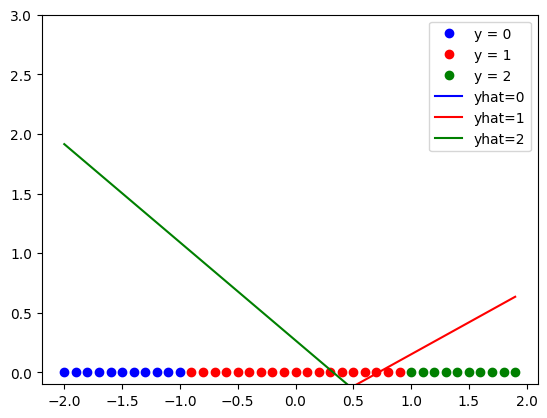

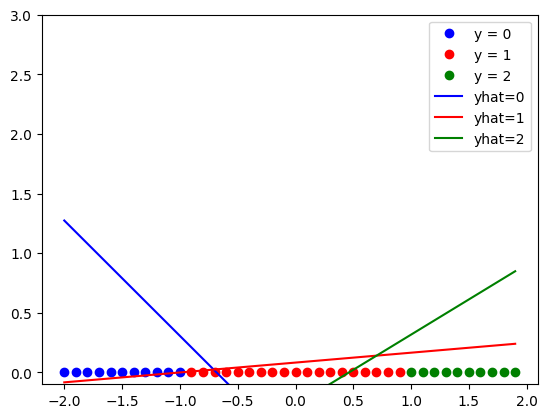

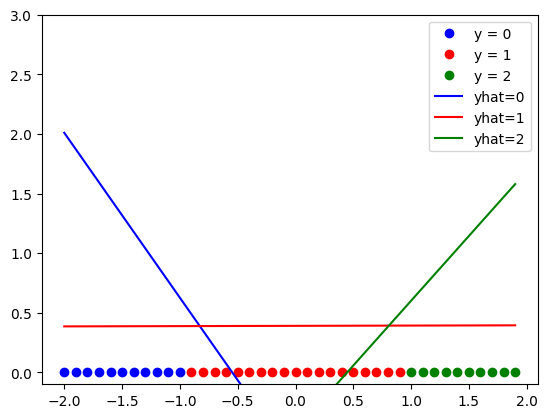

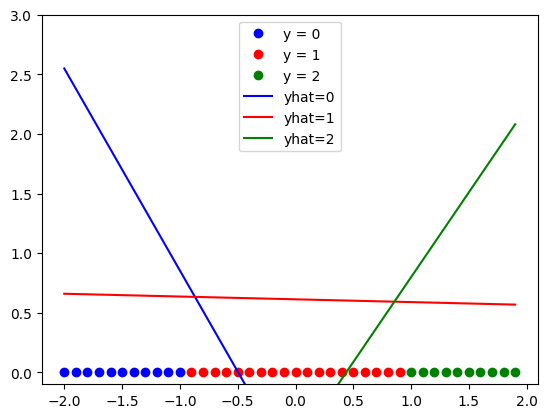

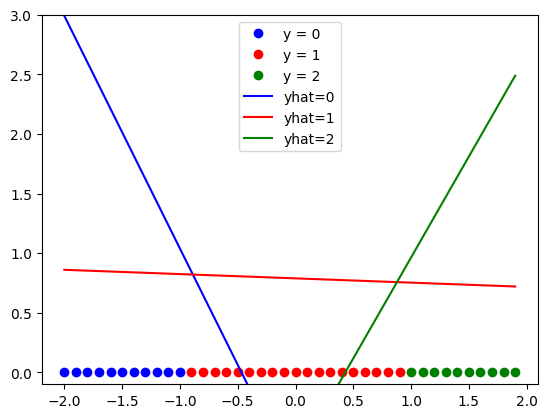

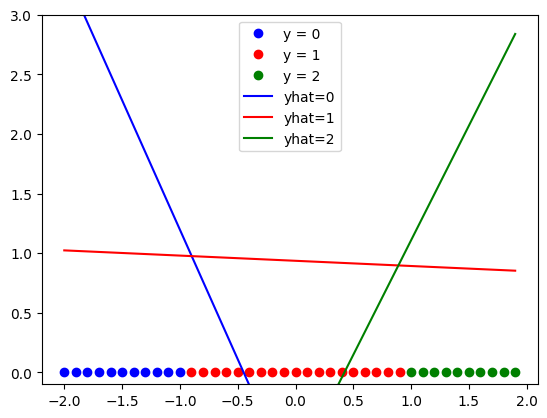

The prediction: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
The accuracy:  0.975
probability of class 0 isg given by  0.9267547726631165
probability of class 1 isg given by  0.07310982048511505
probability of class 2 isg given by  0.00013548212882597


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
train_loader = DataLoader(dataset = data_set, batch_size = 5)
LOSS = []
def train_model(epochs):
  for epoch in range(epochs):
    if epoch % 50 ==0:
      pass
      plot_data(data_set,model)
    for x,y in train_loader:
      optimizer.zero_grad()
      yhat = model(x)
      loss = criterion(yhat,y)
      LOSS.append(loss)
      loss.backward()
      optimizer.step()

train_model(300)
z =  model(data_set.x)
_, yhat = z.max(1)
print("The prediction:", yhat)

correct = (data_set.y == yhat).sum().item()
accuracy = correct / len(data_set)
print("The accuracy: ", accuracy)

Softmax_fn=nn.Softmax(dim=-1)
Probability =Softmax_fn(z)
for i in range(3):
    print("probability of class {} isg given by  {}".format(i, Probability[0,i]) )


# Softmax Mnist dataset

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def PlotParameters(model):
  W = model.state_dict()['linear.weight'].data
  w_min = W.min().item()
  w_max = W.max().item()
  fig,axes = plt.subplots(2,5)
  fig.subplots_adjust(hspace=0.01, wspace=0.1)

  for i,ax in enumerate(axes.flat):
    if i<10:
      ax.set_xlabel("class: {0}".format(i))
      ax.imshow(W[i,:].view(28,28),vmin=w_min,vmax=w_max,cmap='seismic')
      ax.set_xticks([])
      ax.set_yticks([])
  plt.show()

In [ ]:
def show_data(data_sample):
  plt.imshow(data_sample[0].numpy().reshape(28,28),cmap='gray')
  plt.title('y = ' + str(data_sample[1]))

train_dataset = dsets.MNIST(root='./data',train=True,download=True,transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data',download=True,transform=transforms.ToTensor())
print("Type of data element: ", type(train_dataset[0][1]))

Type of data element:  <class 'int'>


The image:  None
The label:  1


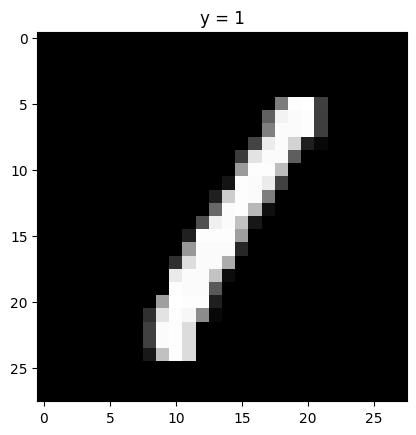

In [ ]:
print("The image: ", show_data(train_dataset[3]))
print("The label: ", train_dataset[3][1])

In [ ]:
# build softmax classifer
class SoftMax(nn.Module):
  def __init__(self,input_size,output_size):
    super(SoftMax,self).__init__()
    self.linear = nn.Linear(input_size,output_size)

  def forward(self,x):
    z = self.linear(x)
    return z

train_dataset[0][0].shape

torch.Size([1, 28, 28])

W:  torch.Size([10, 784])
b:  torch.Size([10])


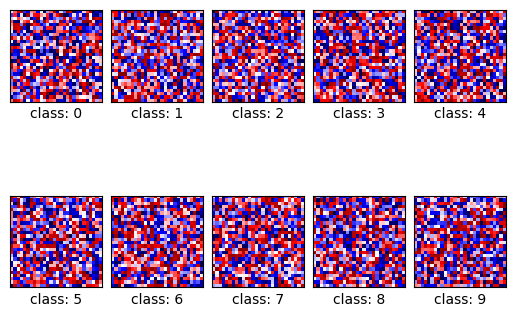

In [ ]:
input_dim = 28*28
output_dim = 10
model = SoftMax(input_dim,output_dim)
print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())
PlotParameters(model)


In [ ]:
learning_rate=0.1
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=5000)



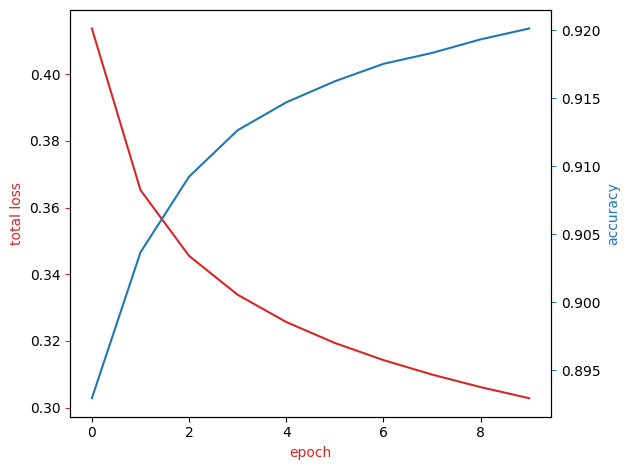

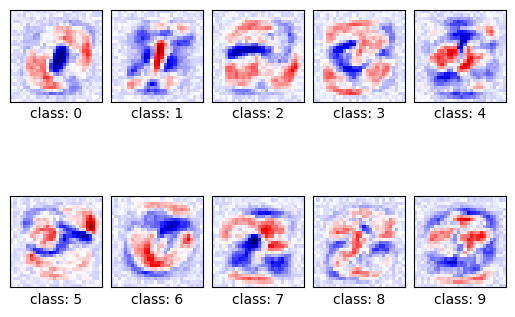

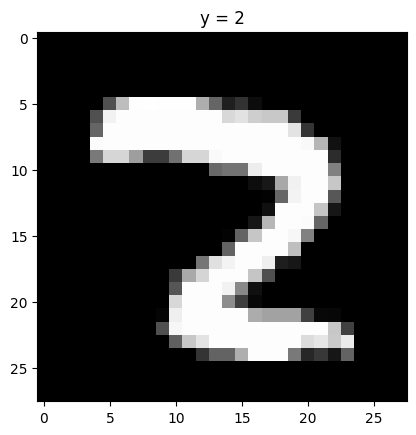

yhat: tensor([7])
probability of class  0.6547541618347168


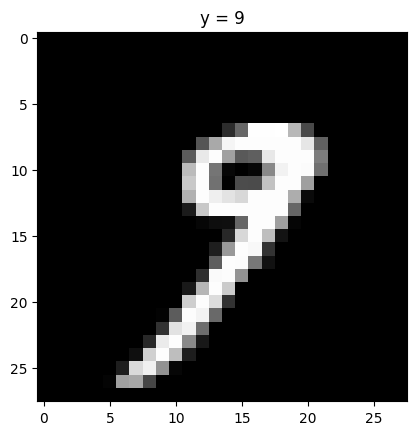

yhat: tensor([7])
probability of class  0.7126083374023438


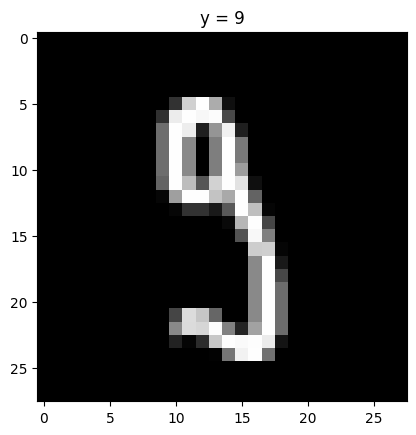

yhat: tensor([5])
probability of class  0.7242330312728882


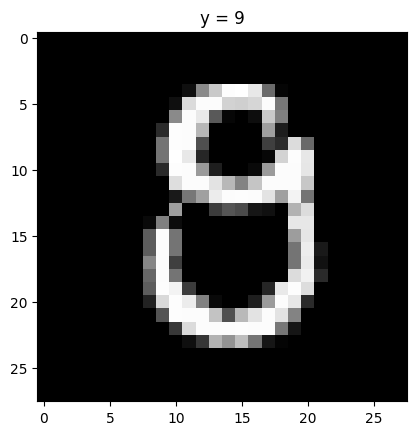

yhat: tensor([8])
probability of class  0.3628711700439453


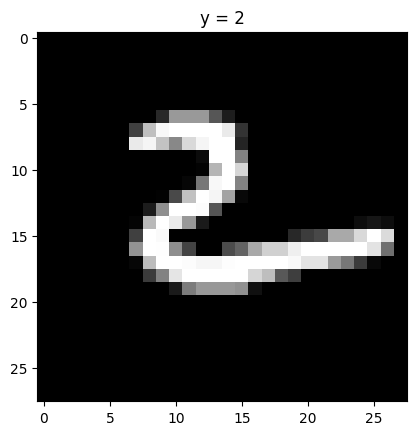

yhat: tensor([6])
probability of class  0.505991518497467


In [ ]:
n_epochs=10
loss_list = []
acc_list = []
N_test = len(validation_dataset)
def train_model(n_epochs):
  for epoch in range(n_epochs):
    for x,y in train_loader:
      optimizer.zero_grad()
      z = model(x.view(-1,28*28))
      loss = criterion(z,y)
      loss.backward()
      optimizer.step()
    correct = 0
    for x_test, y_test in validation_loader:
      z = model(x_test.view(-1,28*28))
      _,yhat= torch.max(z.data,1)
      correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    loss_list.append(loss.data)
    acc_list.append(accuracy)

train_model(n_epochs)
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot( acc_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

PlotParameters(model)
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
  z = model(x.reshape(-1, 28 * 28))
  _, yhat = torch.max(z, 1)
  if yhat != y:
    show_data((x, y))
    plt.show()
    print("yhat:", yhat)
    print("probability of class ", torch.max(Softmax_fn(z)).item())
    count += 1
  if count >= 5:
    break


# Simple One Hidden Layer Neural Network

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch import sigmoid
torch.manual_seed(0)

def PlotStuff(X,Y,model,epoch,leg=True):
  plt.plot(X.numpy(),model(X).detach().numpy(),label=('epoch '+str(epoch)))
  plt.plot(X.numpy(),Y.numpy(),'r')
  plt.xlabel('x')
  if leg == True:
    plt.legend()
  else:
    pass

class Net(nn.Module):
  def __init__(self,D_in,H,D_out):
    super(Net,self).__init__()
    self.linear1 = nn.Linear(D_in,H)
    self.linear2 = nn.Linear(H,D_out)
    self.a1 = None
    self.l1 = None
    self.l2 = None

  def forward(self,x):
    self.l1 = self.linear1(x)
    self.a1 = sigmoid(self.l1)
    self.l2 = self.linear2(self.a1)
    yhat = sigmoid(self.l2)
    return yhat

def train(Y,X,model,optimizer,criterion,epochs=1000):
  cost = []
  total = 0
  for epoch in range(epochs):
    total = 0
    for y,x in zip(Y,X):
      yhat = model(x)
      loss = criterion(yhat,y)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      total+=loss.item()
    cost.append(total)
    if epoch % 300 == 0:
      PlotStuff(X,Y,model,epoch,leg=True)
      plt.show()
      model(X)
      plt.scatter(model.a1.detach().numpy()[:,0],model.a1.detach().numpy()[:,1],c=Y.numpy().reshape(-1))
      plt.title('activations')
      plt.show()
  return cost

In [ ]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

In [ ]:
def criterion_cross(outputs, labels): # like bce loss
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

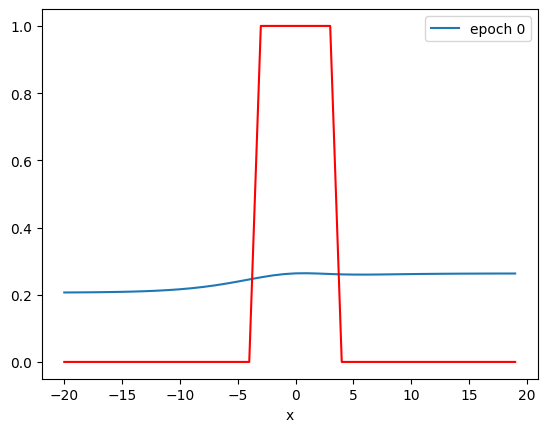

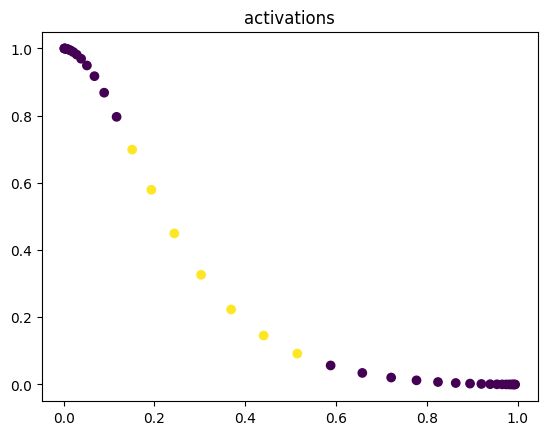

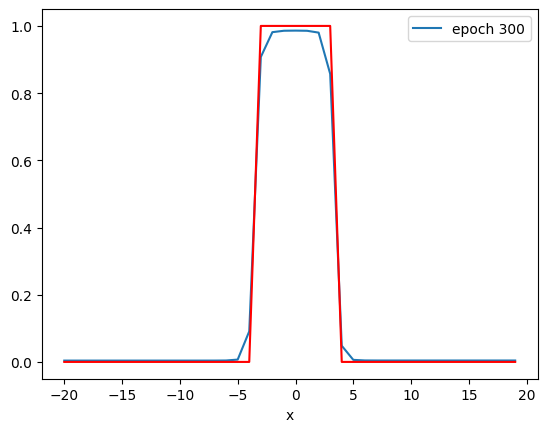

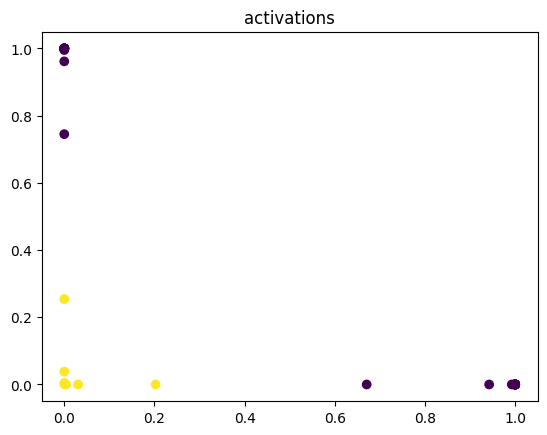

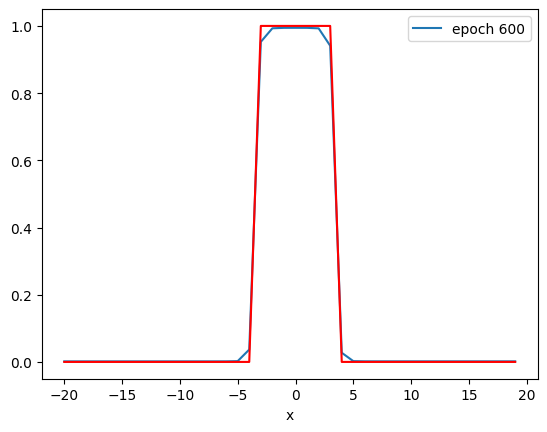

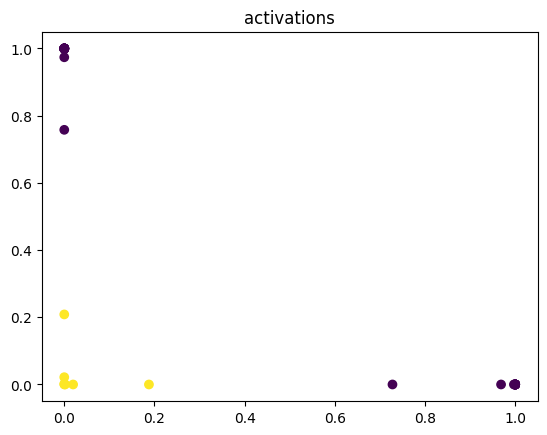

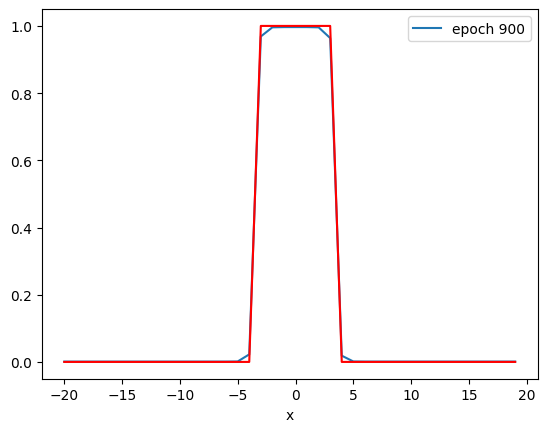

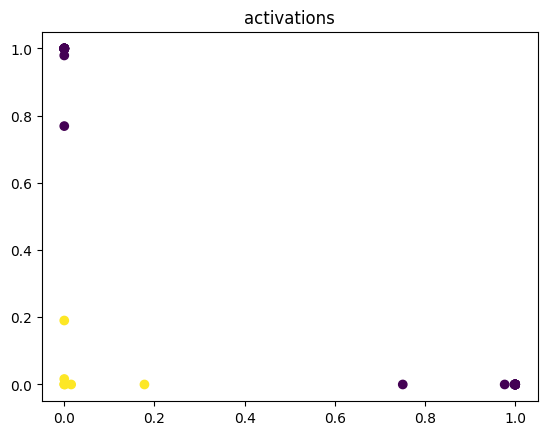

Text(0.5, 1.0, 'cross entropy loss')

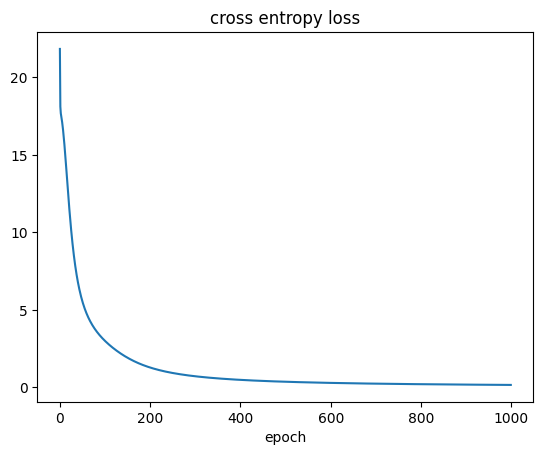

In [ ]:
D_in = 1
H = 2
D_out = 1
learning_rate = 0.1
model = Net(D_in,H,D_out)
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
cost_cross = train(Y,X,model,optimizer,criterion_cross,epochs=1000)
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

In [ ]:
x=torch.tensor([0.0])
yhat=model(x)
print(yhat)
X_=torch.tensor([[0.0],[2.0],[3.0]])
Yhat=model(X_)
print(Yhat)
Yhat=Yhat>0.5
Yhat


tensor([0.9969], grad_fn=<SigmoidBackward0>)
tensor([[0.9969],
        [0.9963],
        [0.9680]], grad_fn=<SigmoidBackward0>)


tensor([[True],
        [True],
        [True]])

# Neural Networks More Hidden Neurons

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader

def get_hist(model,data_set):
  activations=model.activation(data_set.x)
  for i,activation in enumerate(activations):
    plt.hist(activation.numpy(),4,density=True)
    plt.title("Activation layer " + str(i+1))
    plt.xlabel("Activation")
    plt.xlabel("Activation")
    plt.legend()
    plt.show()

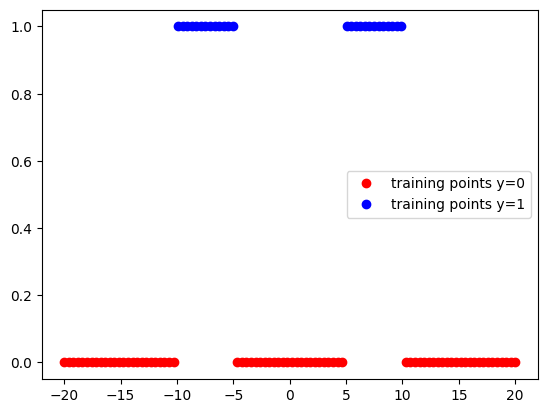

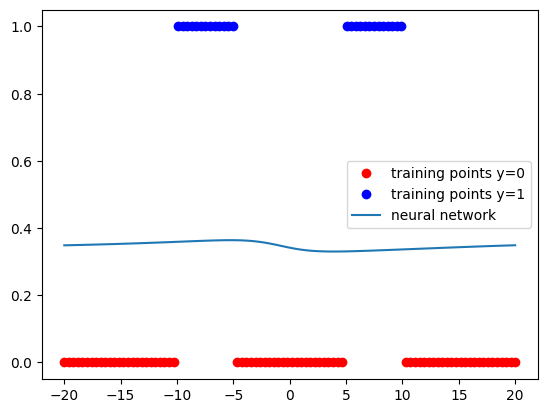

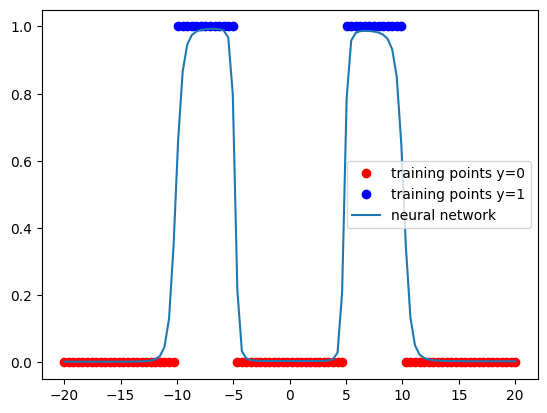

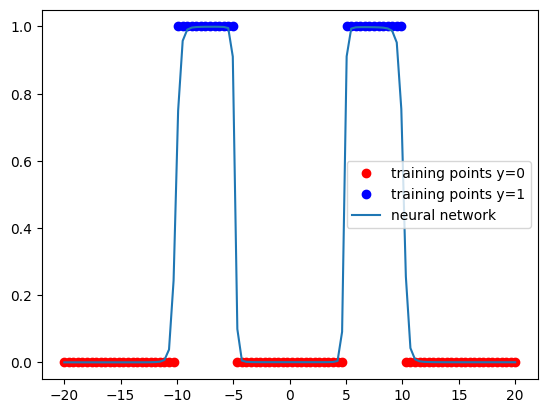

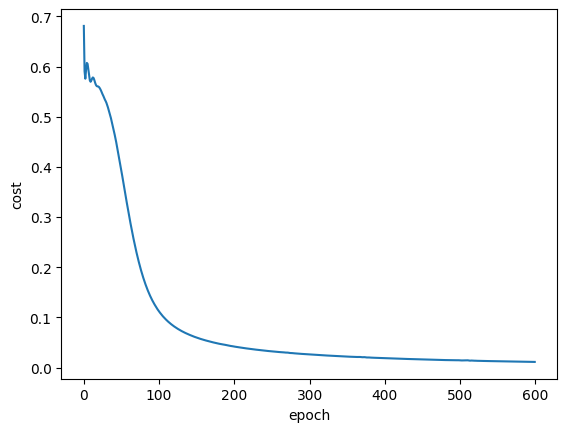

In [ ]:
def PlotStuff(X,Y,model=None,leg=False):
  plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='training points y=0')
  plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='training points y=1')

  if model != None:
    plt.plot(X.numpy(),model(X).detach().numpy(),label='neural network')
  plt.legend()
  plt.show()

class Data(Dataset):
  def __init__(self):
    self.x = torch.linspace(-20,20,100).view(-1,1)
    self.y = torch.zeros(self.x.shape[0])
    self.y[(self.x[:,0]>-10)&(self.x[:,0]<-5)]=1
    self.y[(self.x[:,0]>5)& (self.x[:,0]<10)]=1
    self.y = self.y.view(-1,1)
    self.len = self.x.shape[0]

  def __getitem__(self,index):
    return self.x[index],self.y[index]

  def __len__(self):
    return self.len

class Net(nn.Module):
  def __init__(self,D_in,H,D_out):
    super(Net,self).__init__()
    self.linear1 = nn.Linear(D_in,H)
    self.linear2 = nn.Linear(H,D_out)

  def forward(self,x):
    x = torch.sigmoid(self.linear1(x))
    x = torch.sigmoid(self.linear2(x))
    return x

def train(data_set,model,criterion,train_loader,optimizer,epochs=5,plot_number=10):
  cost = []
  for epoch in range(epochs):
    total = 0
    for x,y in train_loader:
      optimizer.zero_grad()
      yhat = model(x)
      loss = criterion(yhat,y)
      optimizer.zero_grad
      loss.backward()
      optimizer.step()
      total +=loss.item()
    if epoch % plot_number==0:
      PlotStuff(data_set.x,data_set.y,model)
    cost.append(total)

  plt.figure()
  plt.plot(cost)
  plt.xlabel('epoch')
  plt.ylabel('cost')
  plt.show()
  return cost

data_set=Data()
PlotStuff(data_set.x,data_set.y,leg=False)
torch.manual_seed(0)
model=Net(1,9,1)
learning_rate=0.1
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader=DataLoader(dataset=data_set,batch_size=100)
COST=train(data_set,model,criterion, train_loader, optimizer, epochs=600,plot_number=200)



# Practice: Neural Networks with One Hidden Layer: Noisy XOR

In [ ]:
import numpy as np
import torch.nn as nn
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset,DataLoader
'''
這個函數會繪製：

模型的分類邊界（背景顏色標記決策區域）。
數據集中的點（使用不同顏色和標記表示不同類別）。
cmap_light：背景顏色，用於區分決策區域。
cmap_bold：數據點顏色，用於標記真實標籤。



'''
def plot_decision_regions_2class(model,data_set):
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
  cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
  X = data_set.x.numpy()
  y = data_set.y.numpy()
  h = .02
  x_min,x_max = X[:,0].min() -0.1 , X[:,0].max() +0.1
  y_min,y_max = y[:,0].min() -0.1, y[:,0].max() + 0.1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
  '''
  生成一個 2D 網格點矩陣，讓每個點都對應一個 [x, y] 的座標。
  xx：每個網格點的 x 坐標。
  yy：每個網格點的 y 坐標。
  x_min=-1, x_max=1, h=0.5
  xx:
  [[-1.  -0.5  0.   0.5]
  [-1.  -0.5  0.   0.5]
  [-1.  -0.5  0.   0.5]
  [-1.  -0.5  0.   0.5]]

  yy:
  [[-1.  -1.  -1.  -1. ]
  [-0.5 -0.5 -0.5 -0.5]
  [ 0.   0.   0.   0. ]
  [ 0.5  0.5  0.5  0.5]]

  '''
  XX = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  yhat = np.logical_not((model(XX)[:, 0] > 0.5).numpy()).reshape(xx.shape)
  plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
  plt.plot(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], 'o', label='y=0')
  plt.plot(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], 'ro', label='y=1')
  plt.title("decision region")
  plt.legend()

In [ ]:
def accuracy(model, data_set):
    X = data_set.x  # 提取特徵
    y = data_set.y  # 提取標籤
    return np.mean(y.view(-1).numpy() == (model(X)[:, 0] > 0.5).numpy())

In [ ]:
class Net(nn.Module):
  def __init__(self,D_in,H,D_out):
    super(Net,self).__init__()
    self.linear1 = nn.Linear(D_in,H)
    self.linear2 = nn.Linear(H,D_out)

  def forward(self,x):
    x = torch.sigmoid(self.linear1(x))
    x = torch.sigmoid(self.linear2(x))
    return x

def train(data_set,model,criterion,train_loader,optimizer,epochs=5):
  COST = []
  ACC = []
  for epoch in range(epochs):
    total = 0
    for x,y in train_loader:
      optimizer.zero_grad()
      yhat = model(x)
      loss = criterion(yhat,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      total+=loss.item()
    ACC.append(accuracy(model,data_set))
    COST.append(total)
  fig,ax1 = plt.subplots()
  color = 'tab:red'
  ax1.plot(COST,color=color)
  ax1.set_xlabel('epoch', color=color)
  ax1.set_ylabel('total loss', color=color)
  ax1.tick_params(axis='y', color=color)

  ax2 = ax1.twinx() # 將ax1的x軸給ax2
  color = 'tab:blue'
  ax2.set_ylabel('accuracy',color=color)
  ax2.plot(ACC,color=color)
  ax2.tick_params(axis='y',color=color)
  fig.tight_layout()
  plt.show()
  return COST

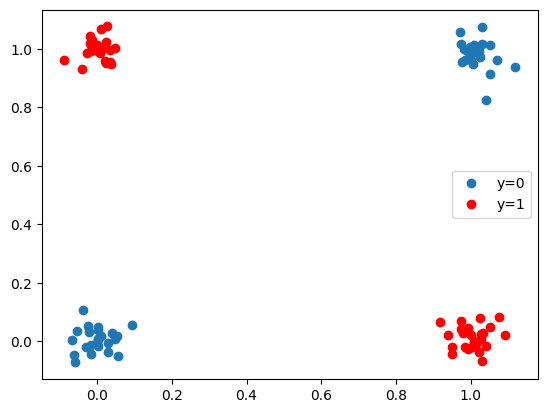

torch.Size([100, 2])


In [ ]:
class XOR_Data(Dataset):
  '''
    資料點按 XOR 規則生成：
    [0.0, 0.0]：標籤 0
    [0.0, 1.0]：標籤 1
    [1.0, 0.0]：標籤 1
    [1.0, 1.0]：標籤 0
  '''
  def __init__(self,N_s=100):
    self.x = torch.zeros((N_s,2)) #2D
    self.y = torch.zeros((N_s,1)) # label value
    for i in range(N_s // 4): # 4象限
      self.x[i,:] = torch.Tensor([0.0, 0.0])
      self.y[i,0] = torch.Tensor([0.0])
      self.x[i + N_s // 4, :] = torch.Tensor([0.0, 1.0])
      self.y[i + N_s // 4, 0] = torch.Tensor([1.0])
      self.x[i + N_s // 2, :] = torch.Tensor([1.0, 0.0])
      self.y[i + N_s // 2, 0] = torch.Tensor([1.0])
      self.x[i + 3 * N_s // 4, :] = torch.Tensor([1.0, 1.0])
      self.y[i + 3 * N_s // 4, 0] = torch.Tensor([0.0])
      self.x = self.x + 0.01 * torch.randn((N_s, 2))

    self.len = N_s

  def __getitem__(self,index):
    return self.x[index],self.y[index]

  def __len__(self):
    return self.len

  def plot_stuff(self):
    plt.plot(self.x[self.y[:,0]==0,0].numpy(),self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
    plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(), self.x[self.y[:, 0] == 1, 1].numpy(), 'ro', label="y=1")
    plt.legend()
    plt.show()

data_set = XOR_Data()
data_set.plot_stuff()
print(data_set.x.shape)




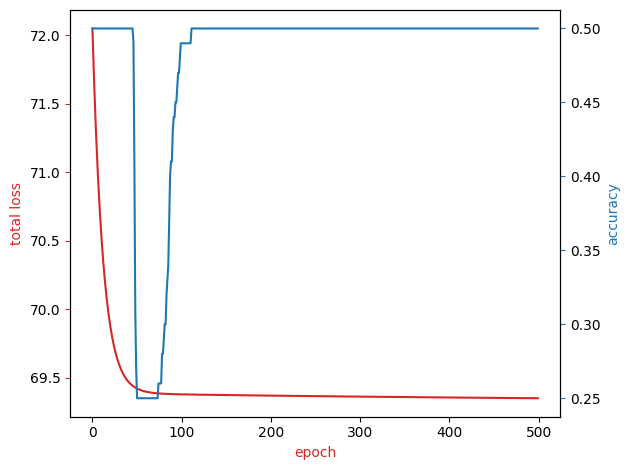

In [ ]:
learning_rate = 0.001
model = Net(2,3,1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS12 = train(data_set, model, criterion, train_loader, optimizer, epochs=500)




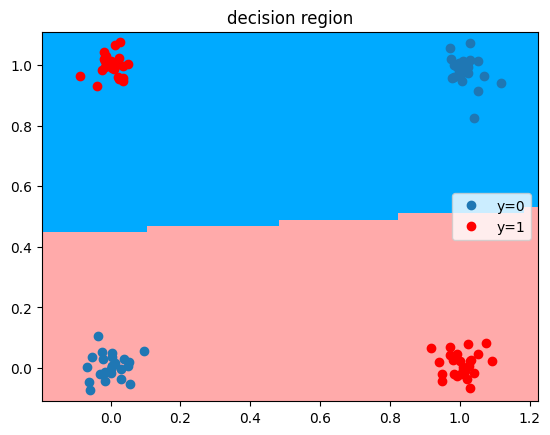

In [ ]:
plot_decision_regions_2class(model, data_set)

># Neural Networks with One Hidden Layer

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

def plot_acc_loss(training_results):
  plt.subplot(2,1,1)
  plt.plot(training_results['training_loss'],'r')
  plt.ylabel('loss')
  plt.title('training loss iterations')
  plt.subplot(2,1,2)
  plt.plot(training_results['validation_accuracy'])
  plt.ylabel('accuracy')
  plt.xlabel('epochs')
  plt.show()

def print_model_parameters(model):
  count = 0
  for ele in model.state_dict():
    count += 1
    if count %2 != 0:
      print("The following are the parameters for the layer ", count // 2 + 1)
    if ele.find('bias')!=-1:
      print('the size of bias ',model.state_dict()[ele].size())
    else:
      print("The size of weights: ", model.state_dict()[ele].size())

def show_data(data_sample):
  plt.imshow(data_sample.numpy().reshape(28,28),cmap='gray')
  plt.show()

class Net(nn.Module):
  def __init__(self,D_in,H,D_out):
    super(Net,self).__init__()
    self.linear1 = nn.Linear(D_in,H)
    self.linear2 = nn.Linear(H,D_out)

  def forward(self,x):
    x = torch.sigmoid(self.linear1(x))
    x = self.linear2(x)
    return x

def train(model,criterion,train_loader,validation_loader,optimizer,epochs=100):
  i=0
  useful_stuff={'training_loss':[],'validation_accuracy':[]}
  for epoch in range(epochs):
    for i,(x,y) in enumerate(train_loader):
      optimizer.zero_grad()
      z = model(x.view(-1, 28 * 28))
      loss = criterion(z,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      useful_stuff['training_loss'].append(loss.data.item())

    correct = 0
    for x,y in validation_loader:
      z = model(x.view(-1,28*28))
      _,label = torch.max(z,1)
      correct += (label == y).sum().item()
    accuracy = 100*(correct/len(validation_dataset))
    useful_stuff['validation_accuracy'].append(accuracy)

  return useful_stuff



In [ ]:
train_dataset = dsets.MNIST(root='./data',train=True,download=True,transform =transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data',download=True,transform=transforms.ToTensor())
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=2000,shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=5000,shuffle=False)


In [ ]:
input_dim=28*28
hidden_dim=100
output_dim=10

model = Net(input_dim,hidden_dim,output_dim)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
training_results = train(model,criterion,train_loader,validation_loader,optimizer,epochs=30)



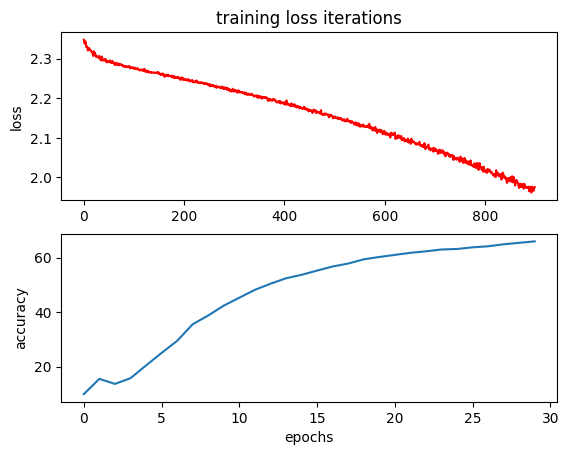

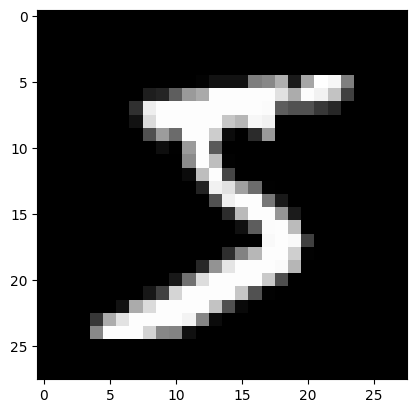

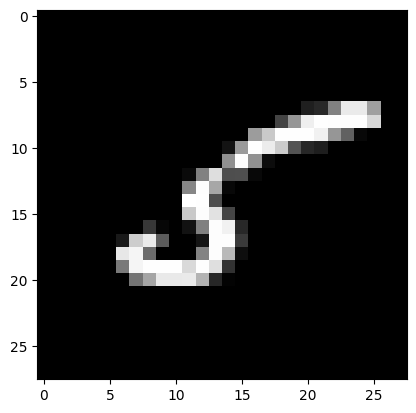

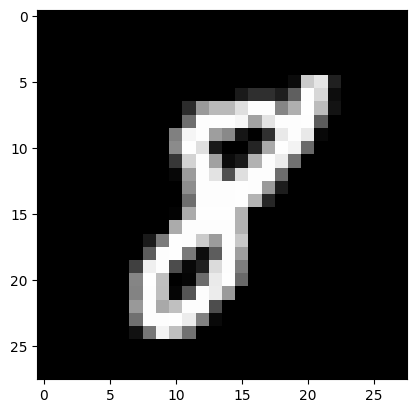

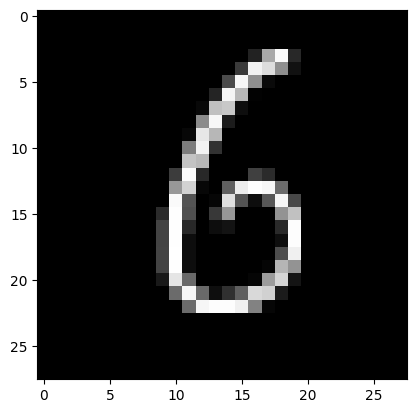

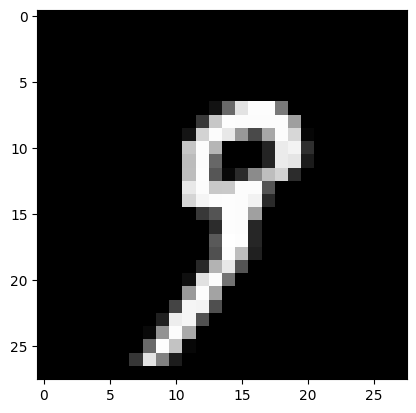

In [ ]:
plot_acc_loss(training_results)
count = 0
for x,y in validation_dataset:
  z = model(x.reshape(-1,28*28))
  _,yhat = torch.max(z,1)
  if yhat != y:
    show_data(x)
    count+=1
  if count >= 5:
    break

# Activation Functions

In [ ]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
torch.manual_seed(0)

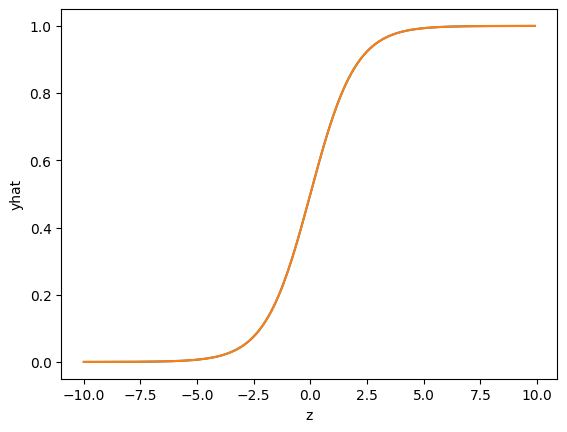

In [ ]:
z = torch.arange(-10,10,0.1).view(-1,1)

sig = nn.Sigmoid()
yhat = sig(z)
plt.plot(z.detach().numpy(),yhat.detach().numpy())
plt.xlabel('z')
plt.ylabel('yhat')

yhat = torch.sigmoid(z)
plt.plot(z.numpy(), yhat.numpy())

plt.show()

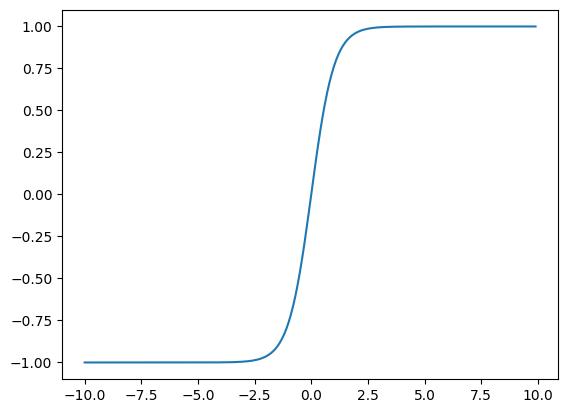

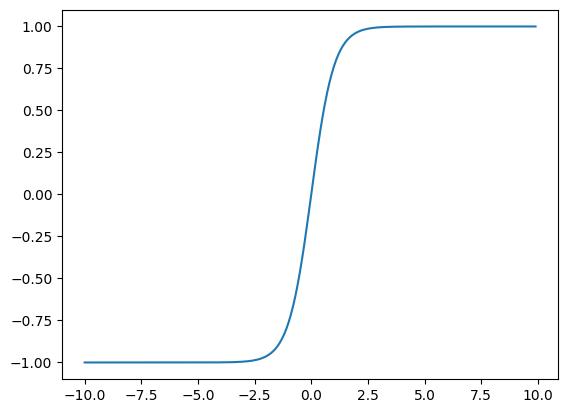

In [ ]:
TANH = nn.Tanh()
yhat = TANH(z)
plt.plot(z.numpy(), yhat.numpy())
plt.show()
yhat = torch.tanh(z)
plt.plot(z.numpy(), yhat.numpy())
plt.show()

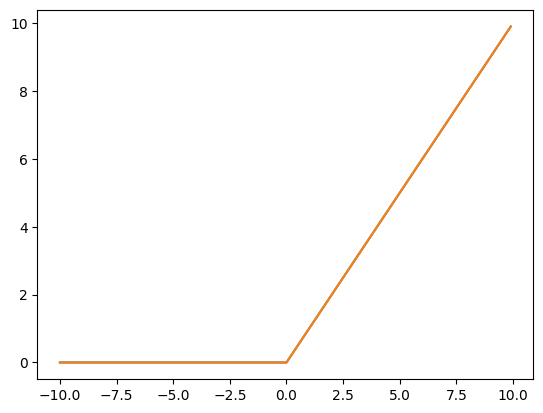

In [ ]:
RELU = nn.ReLU()
yhat = RELU(z)
plt.plot(z.numpy(), yhat.numpy())
yhat = torch.relu(z)
plt.plot(z.numpy(), yhat.numpy())
plt.show()

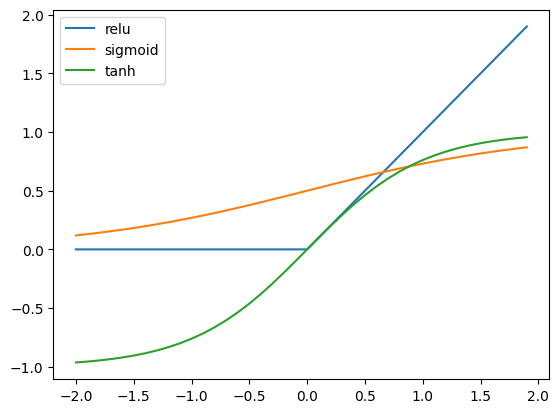

In [ ]:
x = torch.arange(-2, 2, 0.1).view(-1, 1)
plt.plot(x.numpy(), torch.relu(x).numpy(), label='relu')
plt.plot(x.numpy(), torch.sigmoid(x).numpy(), label='sigmoid')
plt.plot(x.numpy(), torch.tanh(x).numpy(), label='tanh')
plt.legend()



# Test Sigmoid, Tanh, and Relu Activations Functions on the MNIST Dataset

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets  as dsets
import matplotlib.pyplot as plt
import numpy as np

class Net(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(D_in,H)
    self.linear2 = nn.Linear(H,D_out)

  def forward(self,x):
    x = torch.sigmoid(self.linear1(x))
    x = self.linear2(x)
    return x

class NetTanh(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(NetTanh, self).__init__()
    self.linear1 = nn.Linear(D_in,H)
    self.linear2 = nn.Linear(H,D_out)

  def forward(self,x):
    x = torch.tanh(self.linear1(x))
    x = self.linear2(x)
    return x


class NetRelu(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(NetRelu, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)

  def forward(self, x):
    x = torch.relu(self.linear1(x))
    x = self.linear2(x)
    return x

# Deep Neural Networks

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(2)

class Net(nn.Module):
  def __init__(self,D_in,H1,H2,D_out):
    super(Net,self).__init__()
    self.linear1 = nn.Linear(D_in,H1)
    self.linear2 = nn.Linear(H1,H2)
    self.linear3 = nn.Linear(H2,D_out)

  def forward(self,x):
    x = torch.sigmoid(self.linear1(x))
    x = torch.sigmoid(self.linear2(x))
    x = self.linear3(x)
    return x

class NetTanh(nn.Module):
  def __init__(self,D_in,H1,H2,D_out):
    super(NetTanh,self).__init__()
    self.linear1 = nn.Linear(D_in,H1)
    self.linear2 = nn.Linear(H1,H2)
    self.linear3 = nn.Linear(H2,D_out)

  def forward(self,x):
    x = torch.tanh(self.linear1(x))
    x = torch.tanh(self.linear2(x))
    x = self.linear3(x)
    return x

class NetRelu(nn.Module):
  def __init__(self,D_in,H1,H2,D_out):
    super(NetRelu,self).__init__()
    self.linear1 = nn.Linear(D_in,H1)
    self.linear2 = nn.Linear(H1,H2)
    self.linear3 = nn.Linear(H2,D_out)

  def forward(self,x):
    x = torch.relu(self.linear1(x))
    x = torch.relu(self.linear2(x))
    x = self.linear3(x)
    return x

def train(model,criterion,train_loader,validation_loader,optimizer,epochs=100):
  i = 0
  useful_stuff = {'training_loss':[],'validation_accuracy':[]}
  for epoch in range(epochs):
    for i,(x,y) in enumerate(train_loader):
      optimizer.zero_grad()
      z = model(x.view(-1,28*28))
      loss = criterion(z,y)
      loss.backward()
      optimizer.step()
      useful_stuff['training_loss'].append(loss.data.item())
    correct = 0
    for x,y in validation_loader:
      z = model(x.view(-1,28*28))
      _,label = torch.max(z,1)
      correct+=(label==y).sum().item()
    accuracy=100*(correct/len(validation_dataset))
    useful_stuff['validation_accuracy'].append(accuracy)

  return useful_stuff

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())


In [ ]:
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

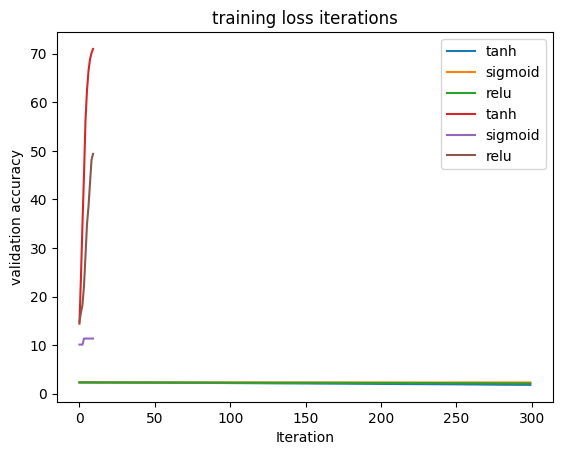

In [ ]:

input_dim = 28 * 28
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10

cust_epochs = 10
learning_rate = 0.01
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

learning_rate = 0.01
model_Tanh = NetTanh(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

learning_rate = 0.01
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

plt.plot(training_results_tanch['validation_accuracy'], label = 'tanh')
plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu')
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')
plt.legend()

# Deeper Neural Networks with nn.ModuleList()

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

def plot_decision_regions_3class(model,data_set):
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
  cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
  X = data_set.x.numpy()
  y = data_set.y.numpy()
  h= .02
  x_min,x_max = X[:,0].min() -0.1, X[:,0].max()+0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx,yy = np.meshgrid(np.arange(x_min,x_max,h)),np.arange(y_min,y_max,h)
  XX = torch.Tensor(np.c_[xx.ravel(),yy.ravel()])
  _,yhat = torch.max(model(XX),1)
  yhat = yhat.numpy().reshape(xx.shape)
  plt.pcolormesh(xx,yy,yhat,cmap=cmap_light)
  plt.plot(X[y[:]==0,0],X[y[:]==0,1],'ro',label='y=0')
  plt.plot(X[y[:]==1,0],X[y[:]==1,1],'go',label='y=1')
  plt.plot(X[y[:]==2,0],X[y[:]==2,1],'o',label='y=2')
  plt.title("decision region")
  plt.legend()
  plt.show()




In [ ]:
class Data(Dataset):
  def __init__(self,K=3,N=500):
    D=2
    X = np.zeros((N * K, D))
    y = np.zeros(N * K, dtype='uint8')
    for j in range(K):
      ix = range(N * j, N * (j + 1))
      r = np.linspace(0.0, 1, N) # radius
      t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2 # theta
      X[ix] = np.c_[r * np.sin(t), r*np.cos(t)]
      y[ix] = j
    self.y = torch.from_numpy(y).type(torch.LongTensor)
    self.x = torch.from_numpy(X).type(torch.FloatTensor)
    self.len = y.shape[0]

  def __getitem__(self,index):
    return self.x[index],self.y[index]

  def __len__(self):
    return self.len

  def plot_stuff(self):
    plt.plot(self.x[self.y[:] == 0, 0].numpy(), self.x[self.y[:] == 0, 1].numpy(), 'o', label="y = 0")
    plt.plot(self.x[self.y[:] == 1, 0].numpy(), self.x[self.y[:] == 1, 1].numpy(), 'ro', label="y = 1")
    plt.plot(self.x[self.y[:] == 2, 0].numpy(), self.x[self.y[:] == 2, 1].numpy(), 'go', label="y = 2")
    plt.legend()
    plt.show()




In [ ]:
class Net(nn.Module):
  def __init__(self,Layers):
    super(Net,self).__init__()
    self.hidden=nn.ModuleList()
    for input_size,output_size in zip(Layers,Layers[1:]):
      self.hidden.append(nn.Linear(input_size,output_size))
  def forward(self,activation):
    L = len(self.hidden)
    for (l,linear_transform) in zip(range(L),self.hidden):
      if l<L-1:
        activation = F.relu(linear_transform(activation))
      else:
        activation = linear_transform(activation)
    return activation

In [ ]:
def train(data_set,model,criterion,train_loader,optimizer,epochs=100):
  LOSS = []
  ACC = []
  for epoch in range(epochs):
    for x,y in train_loader:
      optimizer.zero_grad()
      yhat = model(x)
      loss = criterion(yhat,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      LOSS.append(loss.data.item())
    ACC.append(accuracy(model, data_set))

  fig,ax1 = plt.subplots()
  color = 'tab:red'
  ax1.plot(LOSS,color=color)
  ax1.set_xlabel('Iteration',color=color)
  ax1.set_ylabel('total loss',color=color)
  ax1.tick_params(axis = 'y', color = color)

  ax2 = ax1.twinx()
  color = 'tab:blue'
  ax2.set_ylabel('accuracy', color = color)
  ax2.plot(ACC, color = color)
  ax2.tick_params(axis = 'y', color = color)
  fig.tight_layout()

  plt.show()
  return LOSS

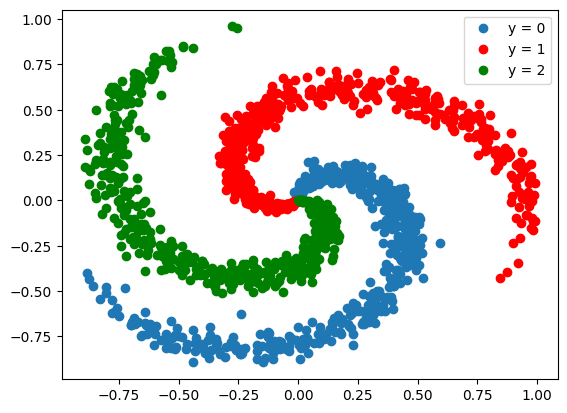

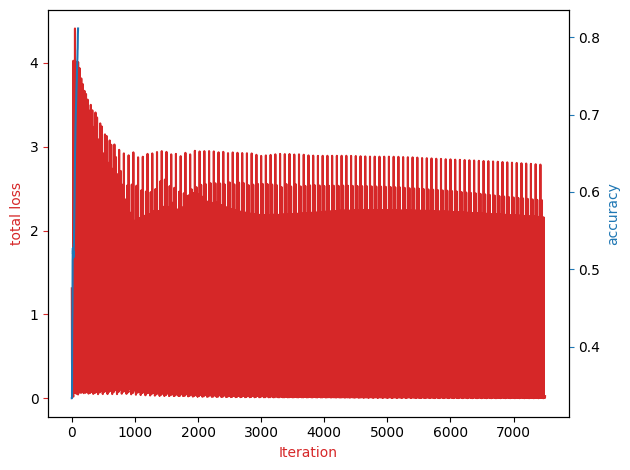

AttributeError: 'list' object has no attribute 'ravel'

In [ ]:
def accuracy(model, data_set):
  _, yhat = torch.max(model(data_set.x), 1)
  return (yhat == data_set.y).numpy().mean()

data_set = Data()
data_set.plot_stuff()
data_set.y = data_set.y.view(-1)
Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=20)
criterion = nn.CrossEntropyLoss()
LOSS = train(data_set, model, criterion, train_loader, optimizer, epochs=100)

plot_decision_regions_3class(model, data_set)

# Using Dropout for Classification

In [ ]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

def plot_decision_regions_3class(data_set,model=None):
  cmap_light = ListedColormap([ '#0000FF','#FF0000'])
  cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])

  X = data_set.x.numpy()
  y = data_set.y.numpy()
  h = 0.02
  x_min , x_max = X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max))
  newdata = np.c_[xx.ravel(),yy.ravel()]

  Z = data_set.multi_dim_poly(newdata).flatten()
  f = np.zeros(Z.shape)
  f[Z > 0] = 1
  f = f.reshape(xx.shape)
  if model != None:
    model.eval()
    XX = torch.Tensor(newdata)
    _, yhat = torch.max(model(XX), 1)
    yhat = yhat.numpy().reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.contour(xx, yy, f, cmap=plt.cm.Paired)
  else:
    plt.contour(xx, yy, f, cmap=plt.cm.Paired)
    plt.pcolormesh(xx, yy, f, cmap=cmap_light)
  plt.title("decision region vs True decision boundary")

In [ ]:
def accuracy(model,data_set):
  _,yhat = torch.max(model(data_set.x),1)
  return (yhat==data_set.y).numpy().mean()

class Data(Dataset):
  def __init__(self,N_SAMPLES=1000,noise_std=0.15,train=True):
    a = np.matrix([-1, 1, 2, 1, 1, -3, 1]).T
    self.x = np.matrix(np.random.rand(N_SAMPLES,2))
    self.f = np.array(a[0] + (self.x) * a[1:3] + np.multiply(self.x[:, 0], self.x[:, 1]) * a[4] + np.multiply(self.x, self.x) * a[5:7]).flatten()
    self.a = a
    self.y = np.zeros(N_SAMPLES)
    self.y[self.f > 0] = 1
    self.y = torch.from_numpy(self.y).type(torch.LongTensor)
    self.x = torch.from_numpy(self.x).type(torch.FloatTensor)
    self.x = self.x + noise_std * torch.randn(self.x.size())
    self.f = torch.from_numpy(self.f)
    self.a = a
    if train == True:
      torch.manual_seed(1)
      self.x = self.x + noise_std * torch.randn(self.x.size())
      torch.manual_seed(0)

  def __getitem__(self,index):
    return self.x[index],self.y[index]

  def __len__(self):
    return self.len

  def plot(self):
    X = data_set.x.numpy()
    y = data_set.y.numpy()
    h = 0.02
    x_min , x_max = X[:,0].min()-0.1,X[:,0].max()+0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = data_set.multi_dim_poly(np.c_[xx.ravel(), yy.ravel()]).flatten()
    f = np.zeros(Z.shape)
    f[Z > 0] = 1
    f = f.reshape(xx.shape)
    plt.title('True decision boundary  and sample points with noise ')
    plt.plot(self.x[self.y == 0, 0].numpy(), self.x[self.y == 0,1].numpy(), 'bo', label='y=0')
    plt.plot(self.x[self.y == 1, 0].numpy(), self.x[self.y == 1,1].numpy(), 'ro', label='y=1')
    plt.contour(xx, yy, f,cmap=plt.cm.Paired)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend()

  def multi_dim_poly(self, x):
    x = np.matrix(x)
    out = np.array(self.a[0] + (x) * self.a[1:3] + np.multiply(x[:, 0], x[:, 1]) * self.a[4] + np.multiply(x, x) * self.a[5:7])
    out = np.array(out)
    return out


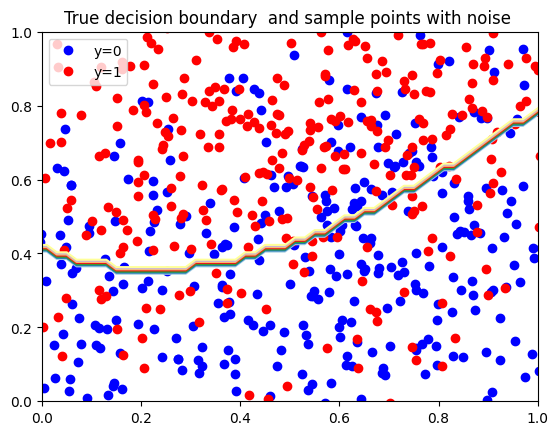

In [ ]:
data_set = Data(noise_std=0.2)
data_set.plot()

In [ ]:
torch.manual_seed(0)
validation_set = Data(train=False)

In [ ]:
class Net(nn.Module):
  def __init__(self,in_size,n_hidden,out_size,p=0):
    super(Net,self).__init__()
    self.drop = nn.Dropout(p=p)
    self.linear1 = nn.Linear(in_size,n_hidden)
    self.linear2 = nn.Linear(n_hidden,n_hidden)
    self.linear3 = nn.Linear(n_hidden,out_size)

  def forward(self,x):
    x = F.relu(self.drop(self.linear1(x)))
    x = F.relu(self.drop(self.linear2(x)))
    x = self.linear3(x)
    return x

model = Net(2, 300, 2)
model_drop = Net(2, 300, 2, p=0.5)

model_drop.train()
optimizer_ofit = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer_drop = torch.optim.Adam(model_drop.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

LOSS = {}
LOSS['training data no dropout'] = []
LOSS['validation data no dropout'] = []
LOSS['training data dropout'] = []
LOSS['validation data dropout'] = []



In [ ]:
epochs = 500
def train_model(epochs):
  for epoch in range(epochs):
    yhat = model(data_set.x)
    yhat_drop = model_drop(data_set.x)
    loss = criterion(yhat, data_set.y)
    loss_drop = criterion(yhat_drop, data_set.y)

    LOSS['training data no dropout'].append(loss.item())
    LOSS['validation data no dropout'].append(criterion(model(validation_set.x), validation_set.y).item())
    LOSS['training data dropout'].append(loss_drop.item())
    model_drop.eval()
    LOSS['validation data dropout'].append(criterion(model_drop(validation_set.x), validation_set.y).item())
    model_drop.train()

    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    loss.backward()
    loss_drop.backward()
    optimizer_ofit.step()
    optimizer_drop.step()

train_model(epochs)

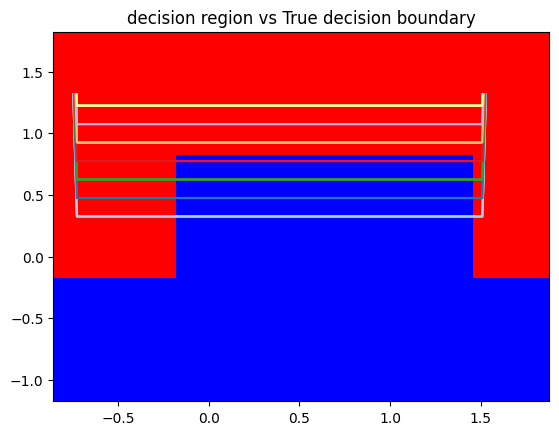

In [ ]:
model_drop.eval()
plot_decision_regions_3class(data_set)
plot_decision_regions_3class(data_set, model)
plot_decision_regions_3class(data_set, model_drop)


# Using Dropout in Regression

In [ ]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(0)


class Data(Dataset):
  def __init__(self,N_SAMPLES=40,noise_std=1,train=True):
    self.x = torch.linspace(-1,1,N_SAMPLES).view(-1,1)
    self.f = self.x ** 2
    if train != True:
      torch.manual_seed(1)
      self.y = self.f + noise_std * torch.randn(self.f.size())
      self.y = self.y.view(-1,1)
      torch.manual_seed(0)
    else:
      self.y = self.f+noise_std*torch.randn(self.f.size())
      self.y = self.y.view(-1,1)

  def __getitem__(self,index):
    return self.x[index],self.y[index]

  def __len__(self):
    return self.len

  def plot(self):
    plt.figure(figsize=(6.1,10))
    plt.scatter(self.x.numpy(),self.y.numpy(), label="Samples")
    plt.plot(self.x.numpy(),self.f.numpy(),label='True Function',color='orange')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((-1, 1))
    plt.ylim((-2, 2.5))
    plt.legend(loc="best")
    plt.show()

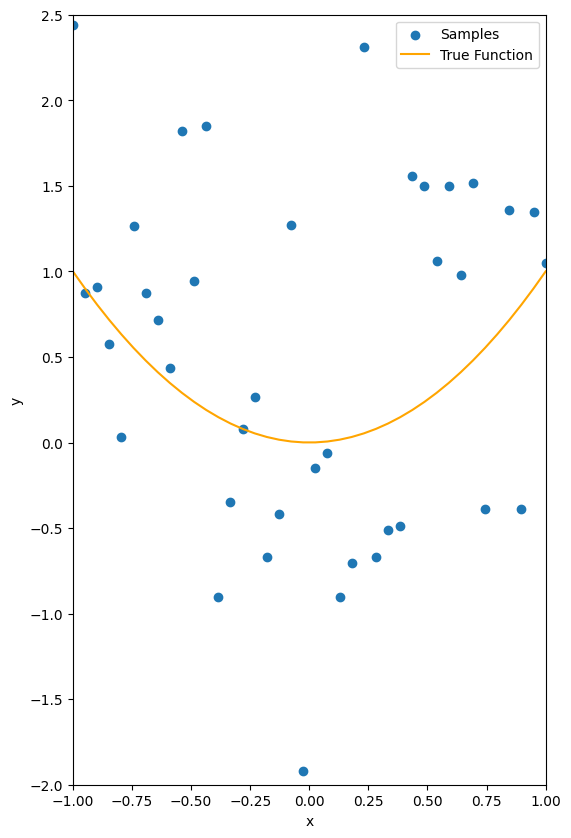

In [ ]:
data_set = Data()
data_set.plot()
validation_set = Data(train=False)

In [ ]:
class Net(nn.Module):
  def __init__(self,in_size,n_hidden,out_size,p=0):
    super(Net,self).__init__()
    self.drop = nn.Dropout(p = p)
    self.linear1 = nn.Linear(in_size,n_hidden)
    self.linear2 = nn.Linear(n_hidden,n_hidden)
    self.linear3 = nn.Linear(n_hidden,out_size)

  def forward(self,x):
    x = F.relu(self.drop(self.linear1(x)))
    x = F.relu(self.drop(self.linear2(x)))
    x = self.linear3(x)
    return x

In [ ]:
model = Net(1, 300, 1)
model_drop = Net(1, 300, 1, p=0.5)

In [ ]:
model_drop.train()

Net(
  (drop): Dropout(p=0.5, inplace=False)
  (linear1): Linear(in_features=1, out_features=300, bias=True)
  (linear2): Linear(in_features=300, out_features=300, bias=True)
  (linear3): Linear(in_features=300, out_features=1, bias=True)
)

In [ ]:

optimizer_ofit = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer_drop = torch.optim.Adam(model_drop.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
LOSS={}
LOSS['training data no dropout']=[]
LOSS['validation data no dropout']=[]
LOSS['training data dropout']=[]
LOSS['validation data dropout']=[]

In [ ]:
epochs = 500
def train_model(epochs):
  for epoch in range(epochs):
    yhat = model(data_set.x)
    yhat_drop = model_drop(data_set.x)
    loss = criterion(yhat,data_set.y)
    loss_drop = criterion(yhat_drop,data_set.y)
    LOSS['training data no dropout'].append(loss.item())
    LOSS['validation data no dropout'].append(criterion(model(validation_set.x), validation_set.y).item())
    LOSS['training data dropout'].append(loss_drop.item())
    model_drop.eval()
    LOSS['validation data dropout'].append(criterion(model_drop(validation_set.x), validation_set.y).item())
    model_drop.train()

    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    loss.backward()
    loss_drop.backward()
    optimizer_ofit.step()
    optimizer_drop.step()

train_model(epochs)

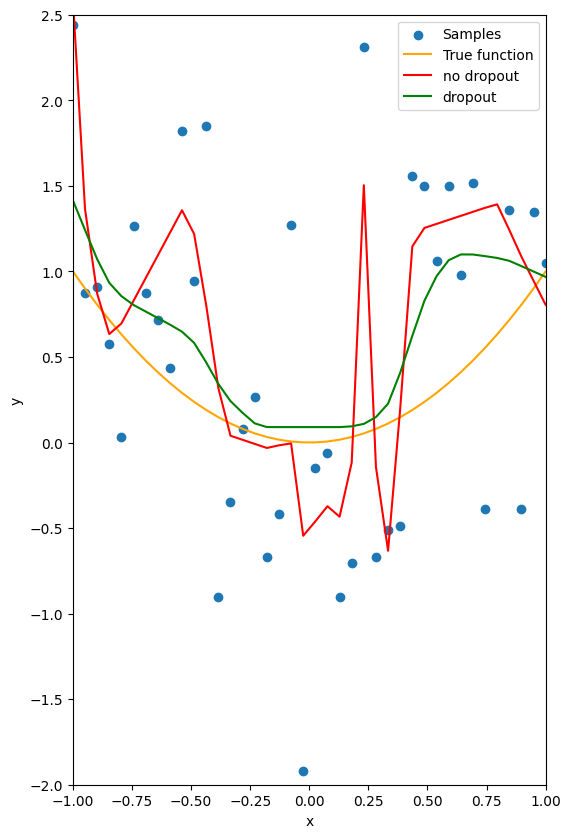

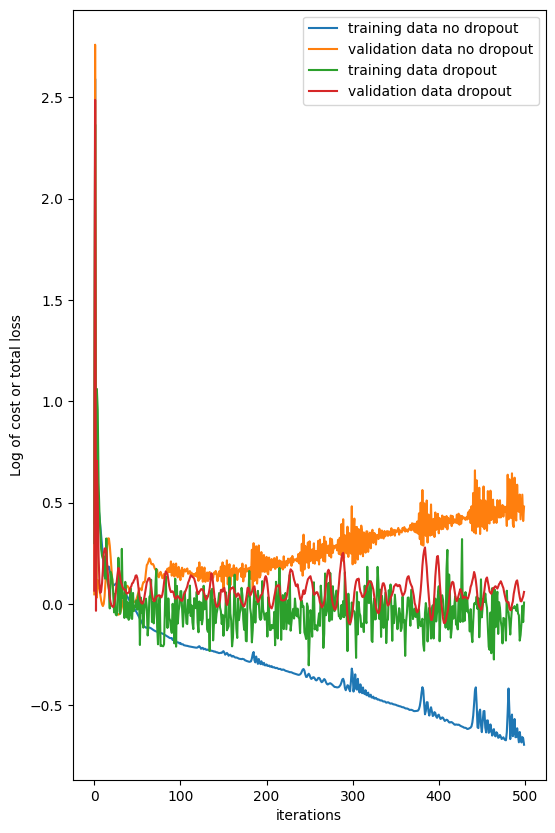

In [ ]:
model_drop.eval()
yhat = model(data_set.x)
yhat_drop = model_drop(data_set.x)
plt.figure(figsize=(6.1, 10))

plt.scatter(data_set.x.numpy(), data_set.y.numpy(), label="Samples")
plt.plot(data_set.x.numpy(), data_set.f.numpy(), label="True function", color='orange')
plt.plot(data_set.x.numpy(), yhat.detach().numpy(), label='no dropout', c='r')
plt.plot(data_set.x.numpy(), yhat_drop.detach().numpy(), label="dropout", c ='g')

plt.xlabel("x")
plt.ylabel("y")
plt.xlim((-1, 1))
plt.ylim((-2, 2.5))
plt.legend(loc = "best")
plt.show()
plt.figure(figsize=(6.1, 10))
for key, value in LOSS.items():
    plt.plot(np.log(np.array(value)), label=key)
    plt.legend()
    plt.xlabel("iterations")
    plt.ylabel("Log of cost or total loss")

# Initialization with Same Weights

In [ ]:
import torch
import torch.nn as nn
from torch import sigmoid
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(0)

def PlotStuff(X,Y,model,epoch,leg=True):
  plt.plot(X.numpy(),model(X).detach().numpy(),label=('epoch'+str(epoch)))
  plt.plot(X.numpy(),Y.numpy(),'r')
  plt.xlabel('x')
  if leg == True:
    plt.legend()
  else:
    pass

class Net(nn.Module):
  def __init__(self,D_in,H,D_out):
    super(Net,self).__init__()
    self.linear1 = nn.Linear(D_in,H)
    self.linear2 = nn.Linear(H,D_out)
    self.a1 = None
    self.l1 = None
    self.l2 = None

  def forward(self,x):
    self.l1 = self.linear1(x)
    self.a1 = sigmoid(self.l1)
    self.l2 = self.linear2(self.a1)
    yhat = sigmoid(self.l2)
    return yhat

def train(Y,X,model,optimizer,criterion,epochs=1000):
  cost = []
  total = 0
  for epoch in range(epochs):
    total = 0
    for y,x in zip(Y,X):
      yhat = model(x)
      loss = criterion(yhat,y)
      #optimizer.zero_grad() 因為初始化
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      total += loss.item()
    cost.append(total)
    if epoch % 300 == 0:
      PlotStuff(X, Y, model, epoch, leg=True)
      plt.show()
      model(X)
      print(model.a1.detach())
      print(model.a1.detach().numpy())
      plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
      plt.title('activations')
      plt.show()
  return cost



In [ ]:
X = torch.arange(-20,20,1).view(-1,1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

In [ ]:
def criterion_cross(outputs, labels): # bce loss binary cross entropy
  out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
  return out

D_in = 1
H = 2
D_out = 1
learning_rate = 0.1
model = Net(D_in, H, D_out)
print(model.state_dict())
# initialize weight
model.state_dict()['linear1.weight'][0]=1.0
model.state_dict()['linear1.weight'][1]=1.0
model.state_dict()['linear1.bias'][0]=0.0
model.state_dict()['linear1.bias'][1]=0.0
model.state_dict()['linear2.weight'][0]=1.0
model.state_dict()['linear2.bias'][0]=0.0
model.state_dict()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


OrderedDict([('linear1.weight', tensor([[ 0.7929],
        [-0.0887]])), ('linear1.bias', tensor([ 0.2646, -0.3022])), ('linear2.weight', tensor([[-0.1390, -0.6755]])), ('linear2.bias', tensor([-0.4683]))])


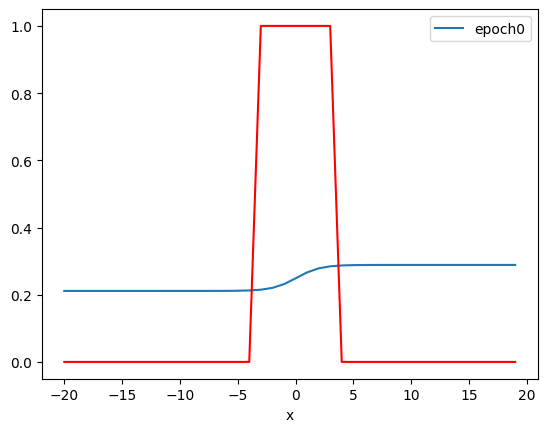

tensor([[3.6079e-09, 3.6079e-09],
        [9.5527e-09, 9.5527e-09],
        [2.5293e-08, 2.5293e-08],
        [6.6969e-08, 6.6969e-08],
        [1.7732e-07, 1.7732e-07],
        [4.6948e-07, 4.6948e-07],
        [1.2431e-06, 1.2431e-06],
        [3.2913e-06, 3.2913e-06],
        [8.7144e-06, 8.7144e-06],
        [2.3073e-05, 2.3073e-05],
        [6.1089e-05, 6.1089e-05],
        [1.6173e-04, 1.6173e-04],
        [4.2810e-04, 4.2810e-04],
        [1.1327e-03, 1.1327e-03],
        [2.9935e-03, 2.9935e-03],
        [7.8871e-03, 7.8871e-03],
        [2.0615e-02, 2.0615e-02],
        [5.2790e-02, 5.2790e-02],
        [1.2859e-01, 1.2859e-01],
        [2.8094e-01, 2.8094e-01],
        [5.0847e-01, 5.0847e-01],
        [7.3255e-01, 7.3255e-01],
        [8.7882e-01, 8.7882e-01],
        [9.5050e-01, 9.5050e-01],
        [9.8071e-01, 9.8071e-01],
        [9.9263e-01, 9.9263e-01],
        [9.9720e-01, 9.9720e-01],
        [9.9894e-01, 9.9894e-01],
        [9.9960e-01, 9.9960e-01],
        [9.998

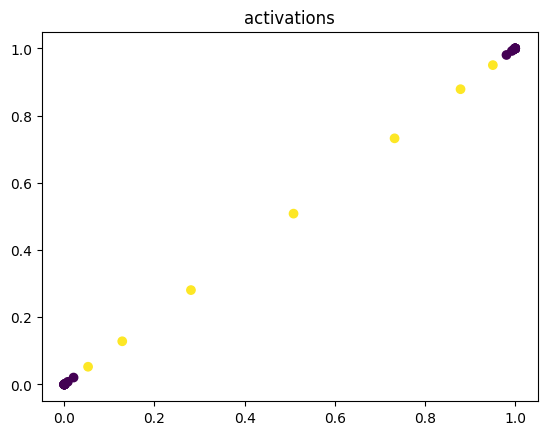

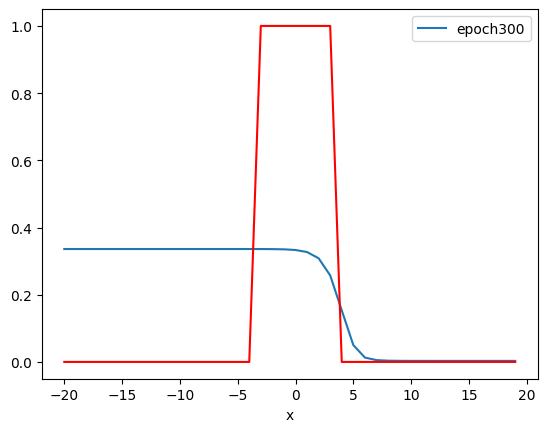

tensor([[2.7706e-13, 2.7706e-13],
        [8.7257e-13, 8.7257e-13],
        [2.7481e-12, 2.7481e-12],
        [8.6549e-12, 8.6549e-12],
        [2.7258e-11, 2.7258e-11],
        [8.5848e-11, 8.5848e-11],
        [2.7037e-10, 2.7037e-10],
        [8.5152e-10, 8.5152e-10],
        [2.6818e-09, 2.6818e-09],
        [8.4461e-09, 8.4461e-09],
        [2.6600e-08, 2.6600e-08],
        [8.3776e-08, 8.3776e-08],
        [2.6385e-07, 2.6385e-07],
        [8.3097e-07, 8.3097e-07],
        [2.6171e-06, 2.6171e-06],
        [8.2423e-06, 8.2423e-06],
        [2.5958e-05, 2.5958e-05],
        [8.1748e-05, 8.1748e-05],
        [2.5742e-04, 2.5742e-04],
        [8.1027e-04, 8.1027e-04],
        [2.5474e-03, 2.5474e-03],
        [7.9793e-03, 7.9793e-03],
        [2.4707e-02, 2.4707e-02],
        [7.3888e-02, 7.3888e-02],
        [2.0081e-01, 2.0081e-01],
        [4.4176e-01, 4.4176e-01],
        [7.1366e-01, 7.1366e-01],
        [8.8700e-01, 8.8700e-01],
        [9.6112e-01, 9.6112e-01],
        [9.873

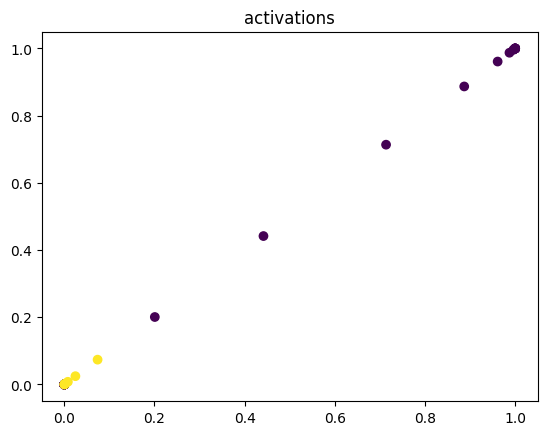

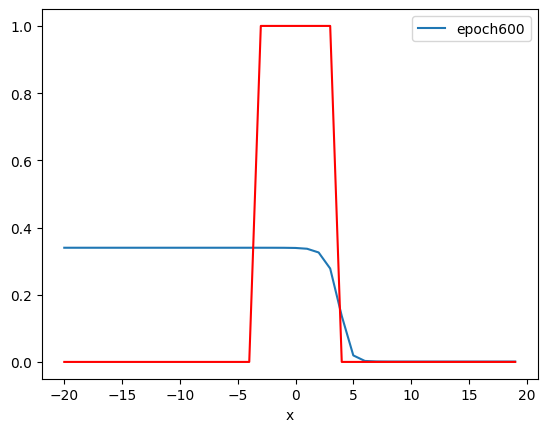

tensor([[1.2045e-17, 1.2045e-17],
        [5.7511e-17, 5.7511e-17],
        [2.7460e-16, 2.7460e-16],
        [1.3112e-15, 1.3112e-15],
        [6.2605e-15, 6.2605e-15],
        [2.9893e-14, 2.9893e-14],
        [1.4273e-13, 1.4273e-13],
        [6.8150e-13, 6.8150e-13],
        [3.2540e-12, 3.2540e-12],
        [1.5537e-11, 1.5537e-11],
        [7.4186e-11, 7.4186e-11],
        [3.5422e-10, 3.5422e-10],
        [1.6913e-09, 1.6913e-09],
        [8.0757e-09, 8.0757e-09],
        [3.8560e-08, 3.8560e-08],
        [1.8411e-07, 1.8411e-07],
        [8.7910e-07, 8.7910e-07],
        [4.1975e-06, 4.1975e-06],
        [2.0042e-05, 2.0042e-05],
        [9.5687e-05, 9.5687e-05],
        [4.5672e-04, 4.5672e-04],
        [2.1770e-03, 2.1770e-03],
        [1.0310e-02, 1.0310e-02],
        [4.7383e-02, 4.7383e-02],
        [1.9192e-01, 1.9192e-01],
        [5.3139e-01, 5.3139e-01],
        [8.4410e-01, 8.4410e-01],
        [9.6276e-01, 9.6276e-01],
        [9.9196e-01, 9.9196e-01],
        [9.983

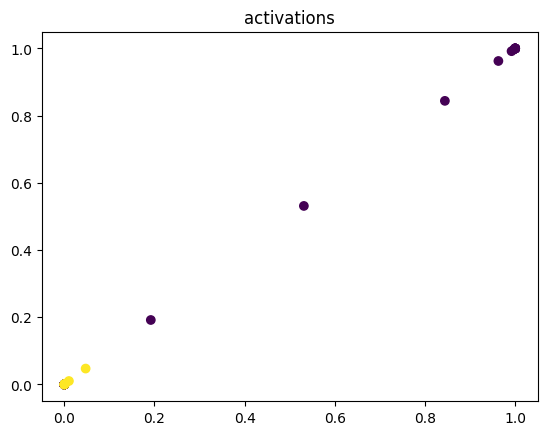

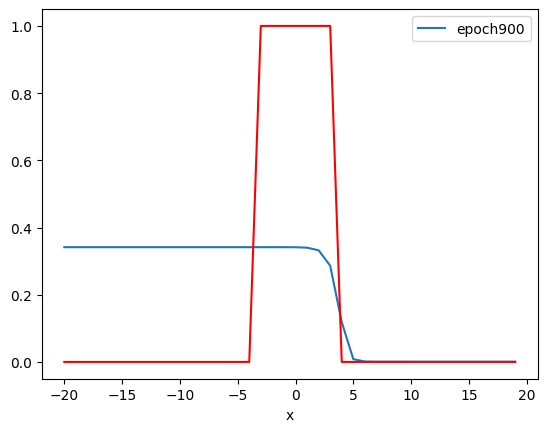

tensor([[1.2746e-20, 1.2746e-20],
        [8.1198e-20, 8.1198e-20],
        [5.1729e-19, 5.1729e-19],
        [3.2955e-18, 3.2955e-18],
        [2.0995e-17, 2.0995e-17],
        [1.3375e-16, 1.3375e-16],
        [8.5210e-16, 8.5210e-16],
        [5.4285e-15, 5.4285e-15],
        [3.4583e-14, 3.4583e-14],
        [2.2032e-13, 2.2032e-13],
        [1.4036e-12, 1.4036e-12],
        [8.9420e-12, 8.9420e-12],
        [5.6967e-11, 5.6967e-11],
        [3.6292e-10, 3.6292e-10],
        [2.3121e-09, 2.3121e-09],
        [1.4730e-08, 1.4730e-08],
        [9.3838e-08, 9.3838e-08],
        [5.9782e-07, 5.9782e-07],
        [3.8085e-06, 3.8085e-06],
        [2.4262e-05, 2.4262e-05],
        [1.5455e-04, 1.5455e-04],
        [9.8377e-04, 9.8377e-04],
        [6.2344e-03, 6.2344e-03],
        [3.8431e-02, 3.8431e-02],
        [2.0294e-01, 2.0294e-01],
        [6.1863e-01, 6.1863e-01],
        [9.1177e-01, 9.1177e-01],
        [9.8504e-01, 9.8504e-01],
        [9.9762e-01, 9.9762e-01],
        [9.996

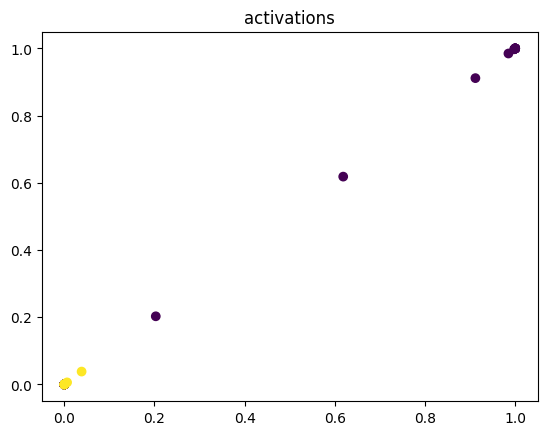

tensor([[0.3420],
        [0.3418],
        [0.3337]], grad_fn=<SigmoidBackward0>)

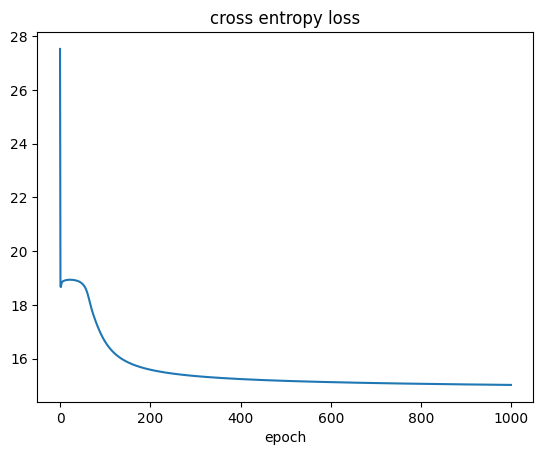

In [ ]:
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

yhat=model(torch.tensor([[-2.0],[0.0],[2.0]]))
yhat

# Test Uniform, Default and Xavier Uniform Initialization on MNIST dataset with tanh activation

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

class Net_Xaiver(nn.Module):
  def __init__(self,Layers):
    super(Net_Xaiver,self).__init__()
    self.hidden = nn.ModuleList()

    for input_size,output_size in zip(Layers,Layers[1:]):
      linear = nn.Linear(input_size,output_size)
      torch.nn.init.xavier_uniform_(linear.weight)
      self.hidden.append(linear)

  def forward(self,x):
    L = len(self.hidden)
    for (l,linear_transform) in zip(range(L),self.hidden):
      if l < L-1:
        x = torch.tanh(linear_transform(x)) # 運用tanh函數 (而非sigmoid)
      else:
        x = linear_transform(x)
    return x

class Net_Uniform(nn.Module):
  def __init__(self,Layers):
    super(Net_Uniform,self).__init__()
    self.hidden = nn.ModuleList()
    for input_size,output_size in zip(Layers,Layers[1:]):
      linear = nn.Linear(input_size,output_size)
      linear.weight.data.uniform_(0,1) #用常態分佈去初始化向量
      self.hidden.append(linear)
  def forward(self,x):
    L = len(self.hidden)
    for (l,linear_transform) in zip(range(L),self.hidden):
      if l < L-1:
        x = torch.tanh(linear_transform(x))
      else:
        x = linear_transform(x)
    return x

class Net(nn.Module):
  def __init__(self,Layers):
    super(Net,self).__init__()
    self.hidden = nn.ModuleList()
    for input_size,output_size in zip(Layers,Layers[1:]):
      linear = nn.Linear(input_size,output_size)
      self.hidden.append(linear)

  def forward(self,x):
    L = len(self.hidden)
    for(l,linear_transform) in zip(range(L),self.hidden):
      if l < L-1:
        x = torch.tanh(linear_transform(x))
      else:
        x = linear_transform(x)
    return x

In [ ]:
def train(model,criterion,train_loader,validation_loader,optimizer,epochs=100):
  i = 0
  loss_acc = {'training_loss':[], 'validation_accuracy':[]}
  for epoch in range(epochs):
    for i,(x,y) in enumerate(train_loader):
      optimizer.zero_grad()
      z = model(x.view(-1,28*28))
      loss = criterion(z,y)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      loss_acc['training_loss'].append(loss.data.item())
    correct = 0
    for x,y in validation_loader:
      yhat = model(x.view(-1,28*28))
      _,label = torch.max(yhat,1)
      correct += (label==y).sum().item()
    accuracy = 100 * (correct / len(validation_dataset))
    loss_acc['validation_accuracy'].append(accuracy)
  return loss_acc

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

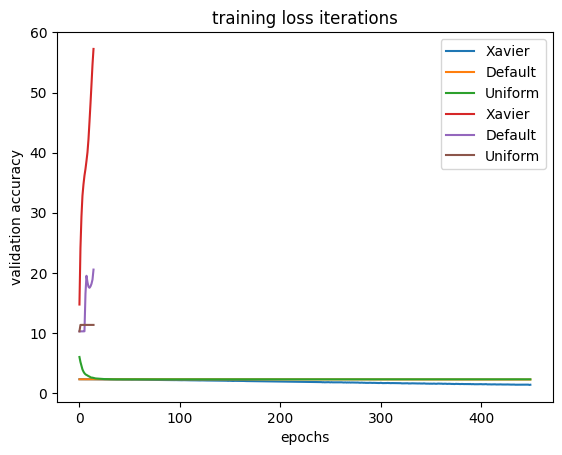

In [ ]:
criterion = nn.CrossEntropyLoss()
input_dim = 28 * 28
output_dim = 10
layers = [input_dim, 100, 10, 100, 10, 100, output_dim]
epochs = 15

model = Net(layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

model_Xavier = Net_Xaiver(layers)
optimizer = torch.optim.SGD(model_Xavier.parameters(), lr=learning_rate)
training_results_Xavier = train(model_Xavier, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

model_Uniform = Net_Uniform(layers)
optimizer = torch.optim.SGD(model_Uniform.parameters(), lr=learning_rate)
training_results_Uniform = train(model_Uniform, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

plt.plot(training_results_Xavier['training_loss'], label='Xavier')
plt.plot(training_results['training_loss'], label='Default')
plt.plot(training_results_Uniform['training_loss'], label='Uniform')
plt.ylabel('loss')
plt.xlabel('iteration ')
plt.title('training loss iterations')
plt.legend()

plt.plot(training_results_Xavier['validation_accuracy'], label='Xavier')
plt.plot(training_results['validation_accuracy'], label='Default')
plt.plot(training_results_Uniform['validation_accuracy'], label='Uniform')
plt.ylabel('validation accuracy')
plt.xlabel('epochs')
plt.legend()



# Test Uniform, Default and He Initialization on MNIST Dataset with Relu Activation

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)


In [ ]:
class Net_He(nn.Module):
  def __init__(self,Layers):
    super(Net_He,self).__init__()
    self.hidden = nn.ModuleList()
    for input_size,output_size in zip(Layers,Layers[1:]):
      linear = nn.Linear(input_size,output_size)
      torch.nn.init.kaiming_uniform_(linear.weight, nonlinearity='relu')
      self.hidden.append(linear)

  def forward(self,x):
    L = len(self.hidden)
    for(l,linear_transform) in zip(range(L),self.hidden):
      if l < L-1:
        x = F.relu(linear_transform(x))
      else:
        x = linear_transform(x)
    return x

class Net_Uniform(nn.Module):
  def __init__(self,Layers):
    super(Net_Uniform,self).__init__()
    self.hidden = nn.ModuleList()

    for input_size,output_size in zip(Layers,Layers[1:]):
      linear = nn.Linear(input_size,output_size)
      linear.weight.data.uniform_(0,1)
      self.hidden.append(linear)

  def forward(self,x):
    L = len(self.hidden)
    for (l,linear_transform) in zip(range(L),self.hidden):
      if l<L-1:
        x = F.relu(linear_transform(x))
      else:
        x = linear_transform(x)
    return x

class Net(nn.Module):
  def __init__(self,Layers):
    super(Net,self).__init__()
    self.hidden = nn.ModuleList()

    for input_size,output_size in zip(Layers,Layers[1:]):
      linear = nn.Linear(input_size,output_size)
      self.hidden.append(linear)

  def forward(self,x):
    L = len(self.hidden)
    for (l,linear_transform) in zip(range(L),self.hidden):
      if l < L - 1:
        x = F.relu(linear_transform(x))
      else:
        x = linear_transform(x)
    return x

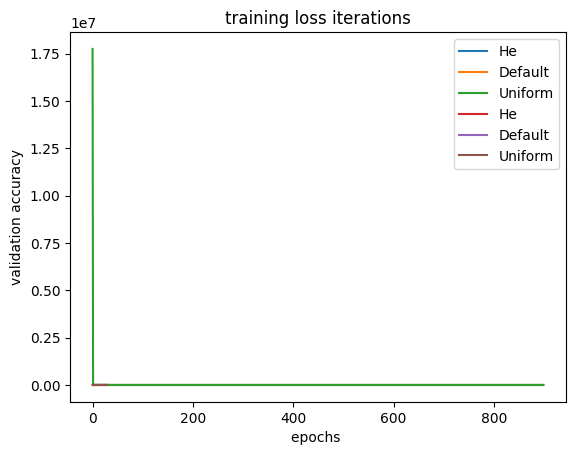

In [ ]:
model = Net(layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader,validation_loader, optimizer, epochs=30)

model_He = Net_He(layers)
optimizer = torch.optim.SGD(model_He.parameters(), lr=learning_rate)
training_results_He = train(model_He, criterion, train_loader, validation_loader, optimizer, epochs=30)

model_Uniform = Net_Uniform(layers)
optimizer = torch.optim.SGD(model_Uniform.parameters(), lr=learning_rate)
training_results_Uniform = train(model_Uniform, criterion, train_loader, validation_loader, optimizer, epochs=30)

plt.plot(training_results_He['training_loss'], label='He')
plt.plot(training_results['training_loss'], label='Default')
plt.plot(training_results_Uniform['training_loss'], label='Uniform')
plt.ylabel('loss')
plt.xlabel('iteration ')
plt.title('training loss iterations')
plt.legend()

plt.plot(training_results_He['validation_accuracy'], label='He')
plt.plot(training_results['validation_accuracy'], label='Default')
plt.plot(training_results_Uniform['validation_accuracy'], label='Uniform')
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')
plt.legend()
plt.show()

# Neural Networks with Momentum

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)
np.random.seed(1)

def plot_decision_regions_3class(model,data_set):
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
  cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
  X = data_set.x.numpy()
  y = data_set.y.numpy()
  h = 0.02
  x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1
  xx,yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
  XX=torch.torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  _,yhat=torch.max(model(XX),1)
  yhat=yhat.numpy().reshape(xx.shape)
  plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
  plt.plot(X[y[:]==0,0], X[y[:]==0,1], 'ro', label='y=0')
  plt.plot(X[y[:]==1,0], X[y[:]==1,1], 'go', label='y=1')
  plt.plot(X[y[:]==2,0], X[y[:]==2,1], 'o', label='y=2')
  plt.title("decision region")
  plt.legend()
  plt.show()


class Data(Dataset):
  def __init__(self,K=3,N=500):
    D = 2
    X = np.zeros((N * K, D)) # data matrix (each row = single example)
    y = np.zeros(N * K, dtype='uint8') # class labels
    for j in range(K):
      ix = range(N * j, N * (j + 1))
      r = np.linspace(0.0,1,N)
      t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2
      X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
      y[ix] = j

    self.y = torch.from_numpy(y).type(torch.LongTensor)
    self.x = torch.from_numpy(X).type(torch.FloatTensor)
    self.len = y.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

    # Get Length
  def __len__(self):
    return self.len

    # Plot the diagram
  def plot_data(self):
    plt.plot(self.x[self.y[:] == 0, 0].numpy(), self.x[self.y[:] == 0, 1].numpy(), 'o', label="y=0")
    plt.plot(self.x[self.y[:] == 1, 0].numpy(), self.x[self.y[:] == 1, 1].numpy(), 'ro', label="y=1")
    plt.plot(self.x[self.y[:] == 2, 0].numpy(),self.x[self.y[:] == 2, 1].numpy(), 'go',label="y=2")
    plt.legend()


class Net(nn.Module):
  def __init__(self,Layers):
    super(Net,self).__init__()
    self.hidden = nn.ModuleList()
    for input_size,output_size in zip(Layers,Layers[1:]):
      linear = nn.Linear(input_size,output_size)
      self.hidden.append(linear)

  def forward(self,x):
    L = len(self.hidden)
    for(l,linear_transform) in zip(range(L),self.hidden):
      if l < L-1:
        x = F.relu(linear_transform(x))
      else:
        x = linear_transform(x)
    return x

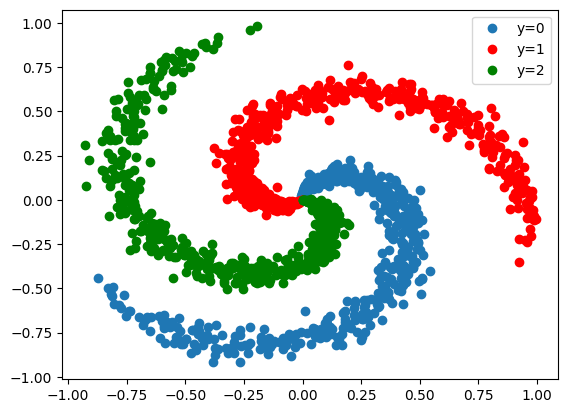

In [ ]:
def accuracy(model, data_set):
    _, yhat = torch.max(model(data_set.x), 1)
    return (yhat == data_set.y).numpy().mean()

def train(data_set,model,criterion,train_loader,optimizer,epochs=100):
  LOSS = []
  ACC = []
  for epoch in range(epochs):
    for x,y in train_loader:
      optimizer.zero_grad()
      yhat = model(x)
      loss = criterion(yhat,y)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    LOSS.append(loss.item())
    ACC.append(accuracy(model,data_set))

  results ={"Loss":LOSS, "Accuracy":ACC}
  fig,ax1 = plt.subplots()
  color = 'tab:red'
  ax1.plot(LOSS,color=color)
  ax1.set_xlabel('epoch', color=color)
  ax1.set_ylabel('total loss', color=color)
  ax1.tick_params(axis = 'y', color=color)

  ax2 = ax1.twinx()
  color = 'tab:blue'
  ax2.set_ylabel('accuracy', color=color)
  ax2.plot(ACC, color=color)
  ax2.tick_params(axis='y', color=color)
  fig.tight_layout()
  plt.show()
  return results

data_set = Data()
data_set.plot_data()
data_set.y = data_set.y.view(-1)
Results = {"momentum 0": {"Loss": 0, "Accuracy:": 0}, "momentum 0.1": {"Loss": 0, "Accuracy:": 0}}
Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=20)
criterion = nn.CrossEntropyLoss()



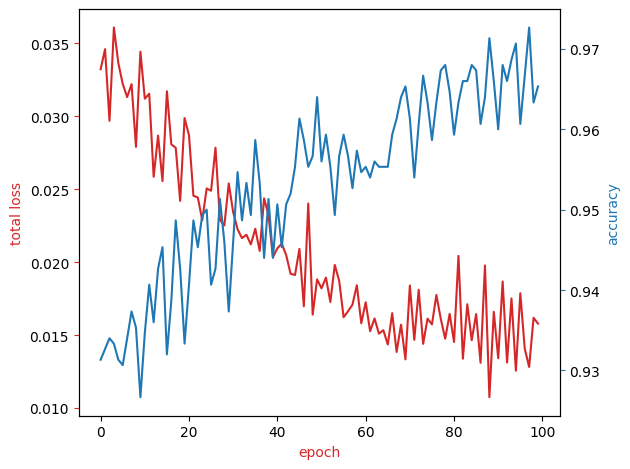

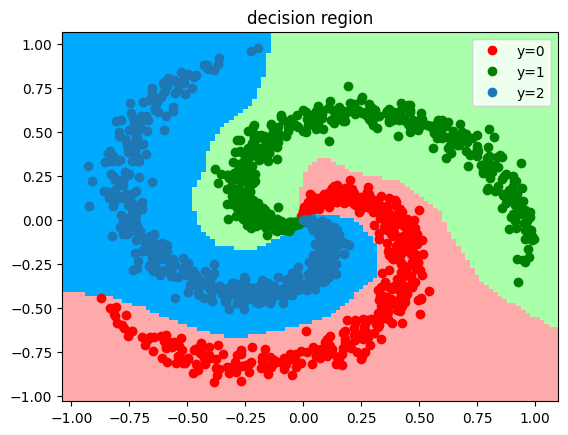

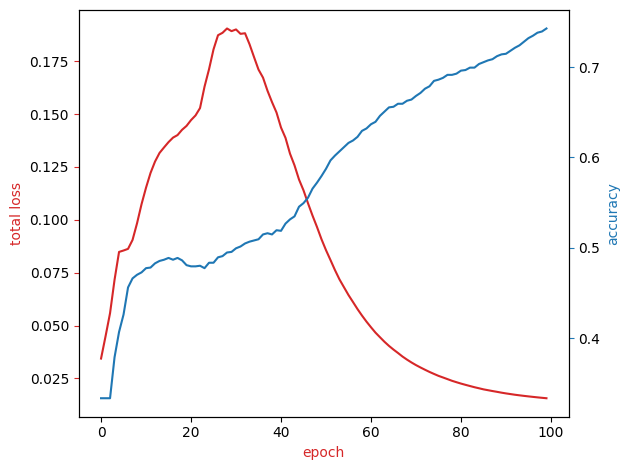

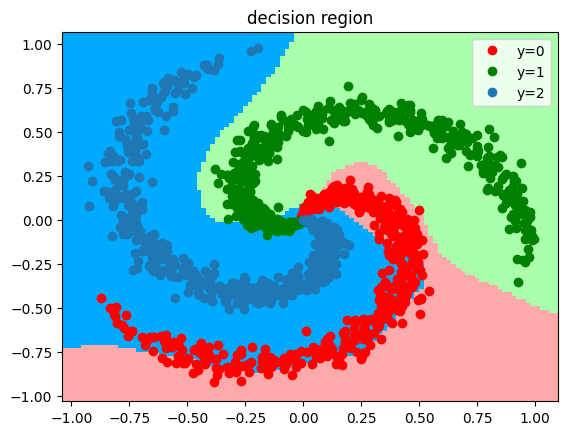

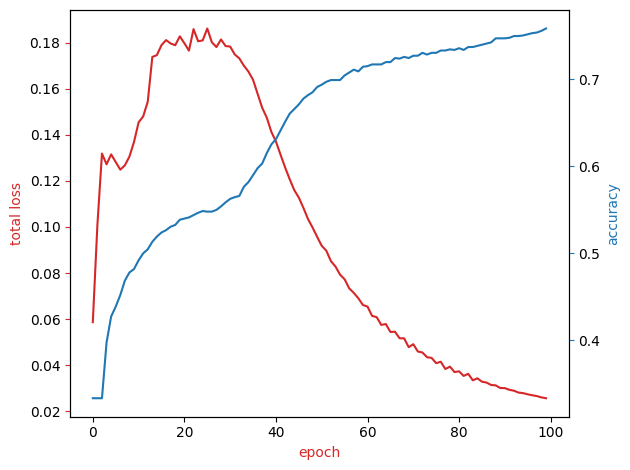

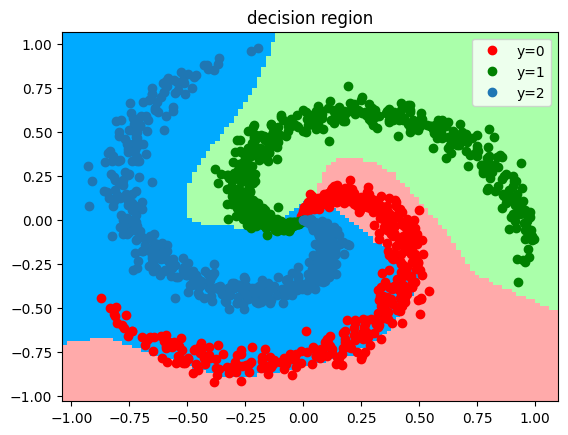

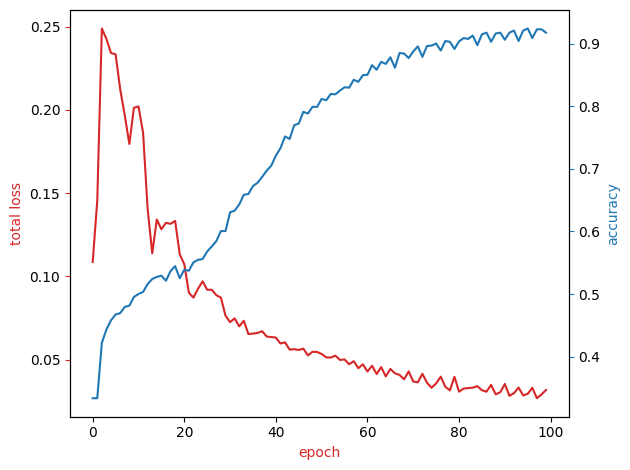

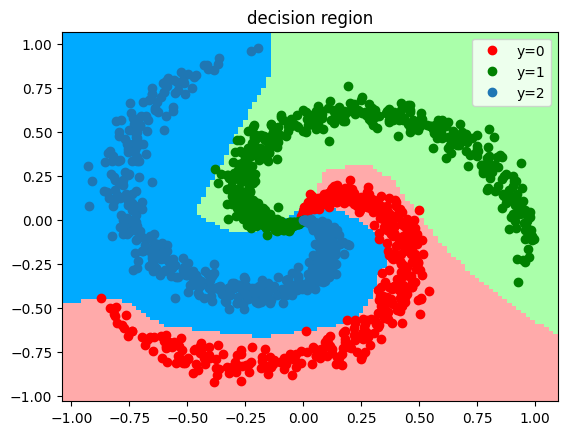

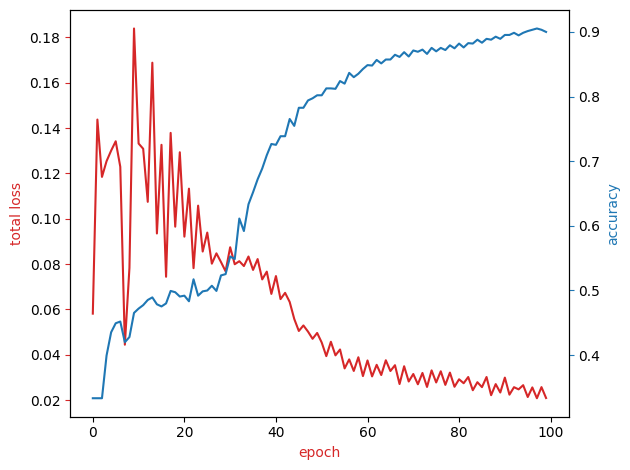

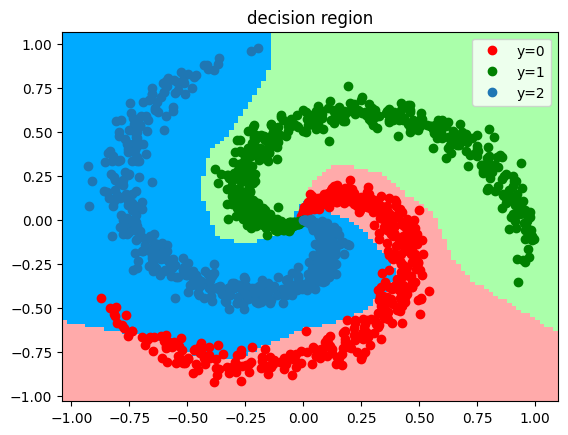

In [ ]:
Results["momentum 0"] = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
plot_decision_regions_3class(model, data_set)
Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.1) ####
train_loader = DataLoader(dataset=data_set, batch_size=20)
criterion = nn.CrossEntropyLoss()
Results["momentum 0.1"] = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
plot_decision_regions_3class(model, data_set)


Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.2) #####
train_loader = DataLoader(dataset=data_set, batch_size=20)
criterion = nn.CrossEntropyLoss()
Results["momentum 0.2"] = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
plot_decision_regions_3class(model, data_set)

Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.4)
train_loader = DataLoader(dataset=data_set, batch_size=20)
criterion = nn.CrossEntropyLoss()
Results["momentum 0.4"] = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
plot_decision_regions_3class(model, data_set)

Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.5)
train_loader = DataLoader(dataset=data_set, batch_size=20)
criterion = nn.CrossEntropyLoss()
Results["momentum 0.5"] = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
plot_decision_regions_3class(model,data_set)



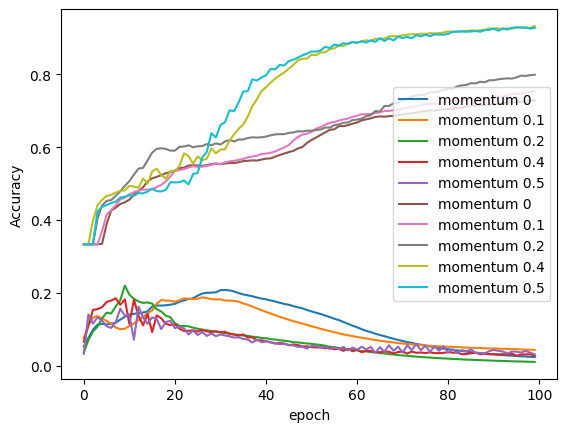

In [ ]:
for key, value in Results.items():
    plt.plot(value['Loss'],label=key)
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('Total Loss or Cost')


for key, value in Results.items():
    plt.plot(value['Accuracy'],label=key)
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')

# Batch Normalization with the MNIST Dataset

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

class NetBatchNorm(nn.Module):
  def __init__(self,in_size,n_hidden1,n_hidden2,out_size):
    super(NetBatchNorm,self).__init__()
    self.linear1 = nn.Linear(in_size,n_hidden1)
    self.linear2 = nn.Linear(n_hidden1,n_hidden2)
    self.linear3 = nn.Linear(n_hidden2,out_size)
    self.bn1 = nn.BatchNorm1d(n_hidden1)
    self.bn2 = nn.BatchNorm1d(n_hidden2)

  def forward(self,x):
    x = self.bn1(torch.sigmoid(self.linear1(x)))
    x = self.bn2(torch.sigmoid(self.linear2(x)))
    x = self.linear3(x)
    return x

  def activation(self,x):
    out = []
    z1 = self.bn1(self.linear1(x))
    out.append(z1.detach().numpy().reshape(-1))
    a1 = torch.sigmoid(z1)
    out.append(a1.detach().numpy().reshape(-1).reshape(-1))
    z2 = self.bn2(self.linear2(a1))
    out.append(z2.detach().numpy().reshape(-1))
    a2 = torch.sigmoid(z2)
    out.append(a2.detach().numpy().reshape(-1))
    return out

class Net(nn.Module):
  def __init__(self,in_size,n_hidden1,n_hidden2,out_size):
    super(Net,self).__init__()
    self.linear1 = nn.Linear(in_size,n_hidden1)
    self.linear2 = nn.Linear(n_hidden1,n_hidden2)
    self.linear3 = nn.Linear(n_hidden2,out_size)

  def forward(self,x):
    x = torch.sigmoid(self.linear1(x))
    x = torch.sigmoid(self.linear2(x))
    x = self.linear3(x)
    return x

  def activation(self,x):
    out = []
    z1 = self.linear1(x)
    out.append(z1.detach().numpy().reshape(-1))
    a1 = torch.sigmoid(z1)
    out.append(a1.detach().numpy().reshape(-1).reshape(-1))
    z2 = self.linear2(a1)
    out.append(z2.detach().numpy().reshape(-1))
    a2 = torch.sigmoid(z2)
    out.append(a2.detach().numpy().reshape(-1))
    return out

def train(model,criterion,train_loader,validation_loader,optimizer,epochs=100):
  i = 0
  useful_stuff = {'training_loss':[],'validation_accuracy':[]}

  for epoch in range(epochs):
    for i,(x,y) in enumerate(train_loader):
      model.train()
      optimizer.zero_grad()
      z = model(x.view(-1,28*28))
      loss = criterion(z,y)
      loss.backward()
      optimizer.step()
      useful_stuff['training_loss'].append(loss.data.item())
    correct = 0
    for x,y in validation_loader:
      model.eval()
      yhat = model(x.view(-1,28*28))
      _,label = torch.max(yhat,1)
      correct += (label==y).sum().item()

    accuracy = 100 * (correct/len(validation_dataset))
    useful_stuff['validation_accuracy'].append(accuracy)
  return useful_stuff

In [ ]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)
criterion = nn.CrossEntropyLoss()

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10
model_norm  = NetBatchNorm(input_dim, hidden_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model_norm.parameters(), lr = 0.1)

In [ ]:
training_results_Norm=train(model_norm , criterion, train_loader, validation_loader, optimizer, epochs=5)

model = Net(input_dim, hidden_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=5)

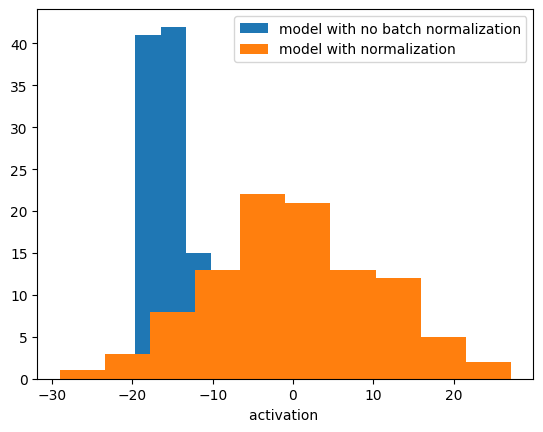

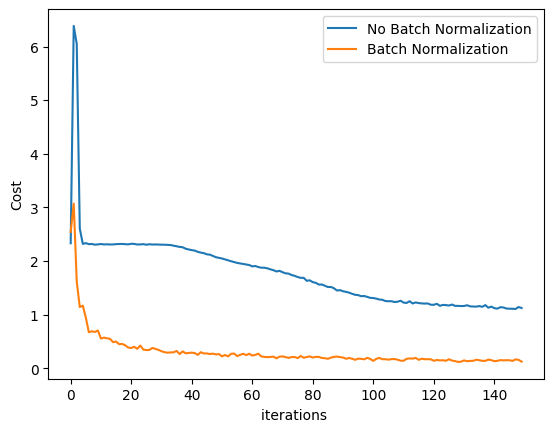

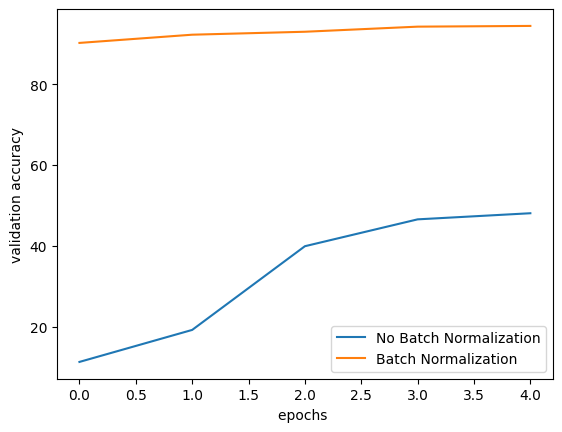

In [ ]:
model.eval()
model_norm.eval()
out=model.activation(validation_dataset[0][0].reshape(-1,28*28))
plt.hist(out[2],label='model with no batch normalization' )
out_norm=model_norm.activation(validation_dataset[0][0].reshape(-1,28*28))
plt.hist(out_norm[2],label='model with normalization')
plt.xlabel("activation ")
plt.legend()
plt.show()

plt.plot(training_results['training_loss'], label='No Batch Normalization')
plt.plot(training_results_Norm['training_loss'], label='Batch Normalization')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()

plt.plot(training_results['validation_accuracy'],label='No Batch Normalization')
plt.plot(training_results_Norm['validation_accuracy'],label='Batch Normalization')
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')
plt.legend()
plt.show()

# Activation function and Maxpooling

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

conv = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3)
Gx = torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0,-1.0]])
conv.state_dict()['weight'][0][0] = Gx
conv.state_dict()['bias'][0]=0.0
image = torch.zeros(1,1,5,5)
image[0,0,:,2]=1
print(image)
Z=conv(image)
A=torch.relu(Z)
relu = nn.ReLU()
relu(Z)

image1=torch.zeros(1,1,4,4)
image1[0,0,0,:]=torch.tensor([1.0,2.0,3.0,-4.0])
image1[0,0,1,:]=torch.tensor([0.0,2.0,-3.0,0.0])
image1[0,0,2,:]=torch.tensor([0.0,2.0,3.0,1.0])
max1=torch.nn.MaxPool2d(2,stride=1)
max1(image1)


tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])


tensor([[[[2., 3., 3.],
          [2., 3., 3.],
          [2., 3., 3.]]]])

In [ ]:
max1=torch.nn.MaxPool2d(2)
max1(image1)

tensor([[[[2., 3.],
          [2., 3.]]]])

# Multiple Input and Output Channels

tensor([[[ 1.,  0., -1.],
         [ 2.,  0., -2.],
         [ 1.,  0., -1.]]])
tensor([[[ 1.,  2.,  1.],
         [ 0.,  0.,  0.],
         [-1., -2., -1.]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])
tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])


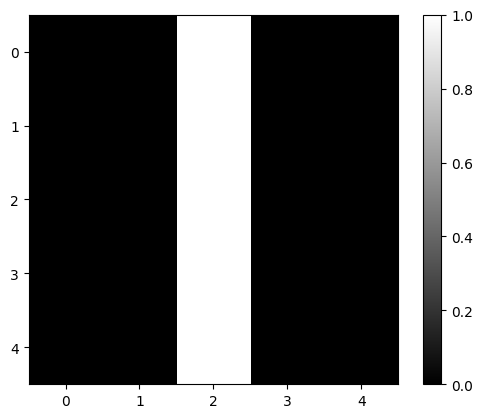

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

conv1 = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3)
Gx = torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
Gy=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

conv1.state_dict()['weight'][0][0] = Gx
conv1.state_dict()['weight'][1][0] = Gy
conv1.state_dict()['weight'][2][0] = torch.ones(3,3)

conv1.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])
conv1.state_dict()['bias']

for x in conv1.state_dict()['weight']:
  print(x)

image = torch.zeros(1,1,5,5)
image[0,0,:,2] = 1
print(image)
plt.imshow(image[0,0,:,:].numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()
plt.show()


tensor([[-4.,  0.,  4.],
        [-4.,  0.,  4.],
        [-4.,  0.,  4.]], grad_fn=<UnbindBackward0>)


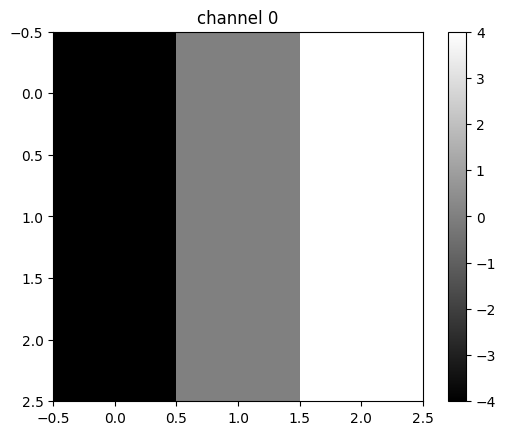

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


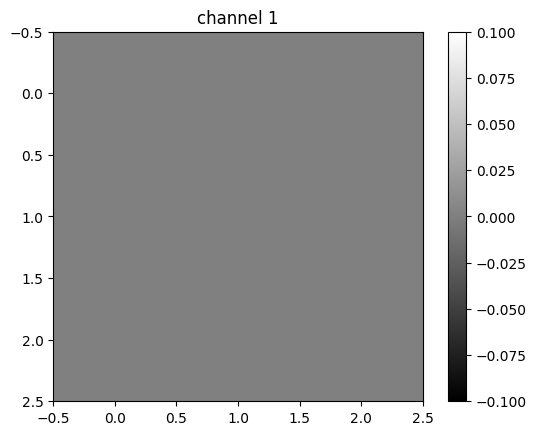

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


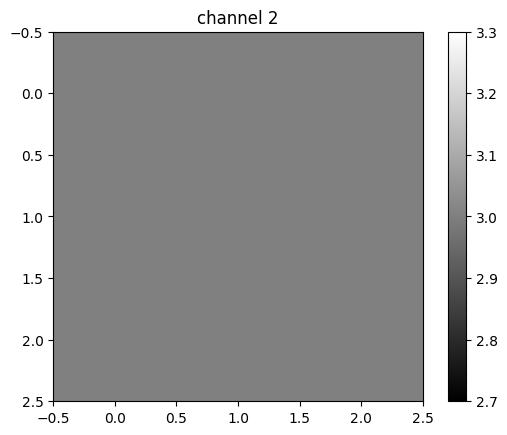

tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])


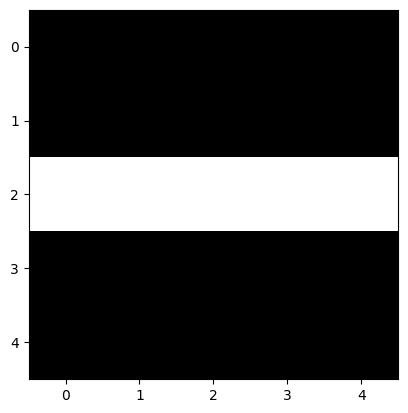

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


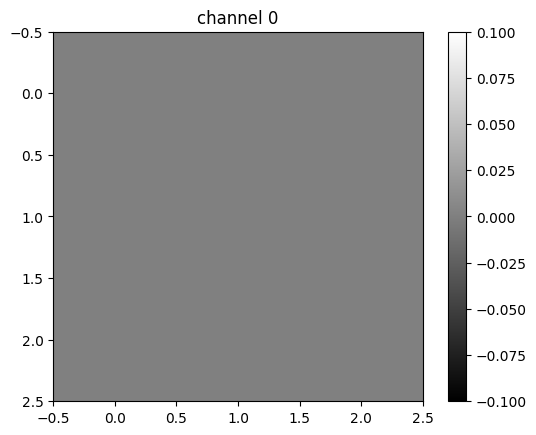

tensor([[-4., -4., -4.],
        [ 0.,  0.,  0.],
        [ 4.,  4.,  4.]], grad_fn=<UnbindBackward0>)


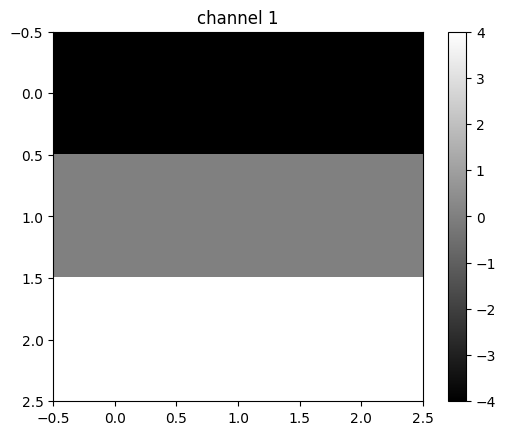

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


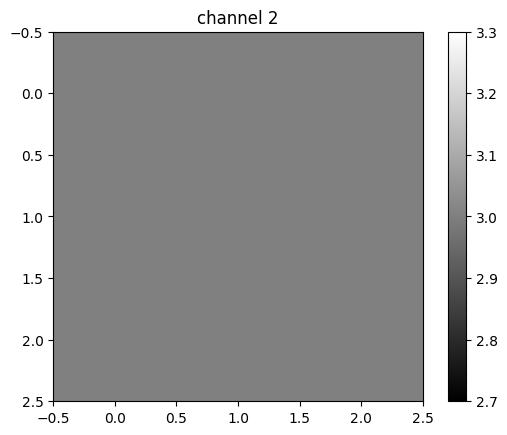

tensor([[[[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [-2., -2., -2., -2., -2.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]],

         [[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 1.,  1.,  1.,  1.,  1.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]]]])

In [ ]:
out=conv1(image)
for channel,image in enumerate(out[0]):
  plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
  print(image)
  plt.title("channel {}".format(channel))
  plt.colorbar()
  plt.show()

image1=torch.zeros(1,1,5,5)
image1[0,0,2,:]=1
print(image1)
plt.imshow(image1[0,0,:,:].detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.show()

out1=conv1(image1)
for channel,image in enumerate(out1[0]):
  plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
  print(image)
  plt.title("channel {}".format(channel))
  plt.colorbar()
  plt.show()

image2=torch.zeros(1,2,5,5)
image2[0,0,2,:]=-2
image2[0,1,2,:]=1
image2



In [ ]:
conv3 = nn.Conv2d(in_channels=2, out_channels=1,kernel_size=3)
Gx1=torch.tensor([[0.0,0.0,0.0],[0,1.0,0],[0.0,0.0,0.0]])
conv3.state_dict()['weight'][0][0]=1*Gx1
conv3.state_dict()['weight'][0][1]=-2*Gx1
conv3.state_dict()['bias'][:]=torch.tensor([0.0])
conv3.state_dict()['weight']

tensor([[[[ 0.,  0.,  0.],
          [ 0.,  1.,  0.],
          [ 0.,  0.,  0.]],

         [[-0., -0., -0.],
          [-0., -2., -0.],
          [-0., -0., -0.]]]])

In [ ]:
conv4 = nn.Conv2d(in_channels=2, out_channels=3,kernel_size=3)
conv4.state_dict()['weight'][0][0]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][0][1]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])


conv4.state_dict()['weight'][1][0]=torch.tensor([[0.0,0.0,0.0],[0,1,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][1][1]=torch.tensor([[0.0,0.0,0.0],[0,-1,0],[0.0,0.0,0.0]])

conv4.state_dict()['weight'][2][0]=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
conv4.state_dict()['weight'][2][1]=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

conv4.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


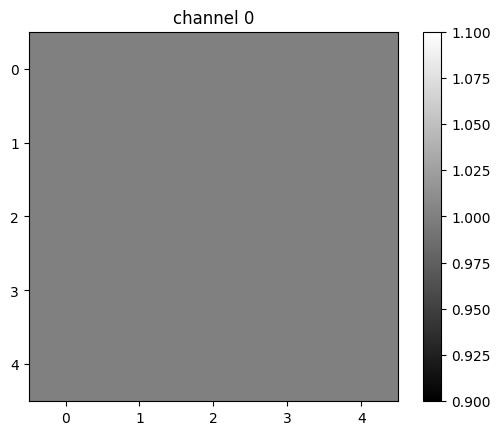

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


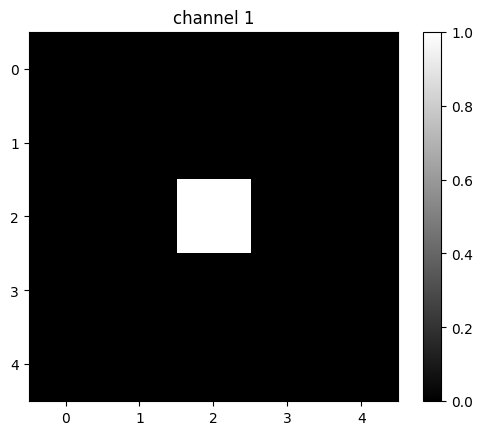

tensor([[[[ 0.5000,  0.5000,  0.5000],
          [ 0.5000,  1.0000,  0.5000],
          [ 0.5000,  0.5000,  0.5000]],

         [[ 1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000]],

         [[-1.0000, -2.0000, -1.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 1.0000,  2.0000,  1.0000]]]], grad_fn=<ConvolutionBackward0>)

In [ ]:
image4=torch.zeros(1,2,5,5)
image4[0][0]=torch.ones(5,5)
image4[0][1][2][2]=1
for channel,image in enumerate(image4[0]):
  plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
  print(image)
  plt.title("channel {}".format(channel))
  plt.colorbar()
  plt.show()
z=conv4(image4)
z

# Convolutional Neural Network Simple example

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

torch.manual_seed(4)

def plot_channels(W):
  n_out = W.shape[0]
  n_in = W.shape[1]
  w_min = W.min().item()
  w_max = W.max().item()
  fig, axes = plt.subplots(n_out,n_in)
  fig.subplots_adjust(hspace = 0.1)
  out_index = 0
  in_index = 0
  for ax in axes.flat:
    if in_index > n_in-1:
      out_index = out_index + 1
      in_index = 0
    ax.imshow(W[out_index,in_index,:,:], vmin=w_min, vmax=w_max, cmap='seismic')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    in_index=in_index+1

  plt.show()